# Test the hologram performances with HD111980 data 30 may 2017
==================================================================================================

- author : Sylvie
- creation date   : October 25 th2017
- update : October 27th 2017
- Version : 1.0


The goal of this notebook is to study the background to understand the accurracy of the measurement



#### problem because limitation in output of data

- firt I tried to generate a config file for jupyter

If you ran jupyter notebook --generate-config to create it, it should be in the correct place already. If not, try putting it at ~/.jupyter/jupyter_notebook_config.py

- and I set : 
> c.NotebookApp.iopub_data_rate_limit = 1000000

but it failed again so I launch jupyter as follow:

> jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 Ana2DShapeSpectra.ipynb

So it behaves better

In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

Ana2DBackground
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_31may17/HD205905


In [4]:
from astropy.modeling import models, fitting

In [5]:
import pandas as pd

# Flags

In [6]:
ShowAllImageFlag=False
ShowAllImageFirstOrderFlag=False
ShowAllImageZeroOrderFlag=False

# Input directory

In [7]:
#inputdir="../OverScanRemove/trim_images"
#inputdir="../../data/CTIODataJune2017_reducedRed/data_05jun17/"
inputdir="./rotated_fitsimages"
MIN_IMGNUMBER=141
MAX_IMGNUMBER=175
object_name='HD205905'
date="20170531"
tag = "rotimg"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

# Output directory

In [8]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

#outputdir="./spectrum_fitsspec"
#ensure_dir(outputdir)

# Open files
===================================

## order 0 position in original image

In [9]:
df=pd.read_csv('xy_pointing.csv')
x_star=df["x_pointing"]
y_star=df["y_pointing"]
all_theta=df["theta"]
x_pointing=x_star
y_pointing=y_star

In [10]:
order0_positions = np.array([x_pointing,y_pointing]).T

In [11]:
df.head()

Unnamed: 0     theta  x_pointing  y_pointing
0           0 -0.625720  845.795879  552.012168
1           1 -0.731443  844.736736  552.904702
2           2 -0.962140  844.674362  551.145843
3           3 -1.841007  844.975521  550.541335
4           4 -1.599145  844.093535  549.984851

## order 0 position in rotated and cut image

In [12]:
df2=pd.read_csv('x_y_guess2.csv')
x_star2=df2["x_guess2"]
y_star2=df2["y_guess2"]
order0_positions2 = np.array([x_star2,y_star2]).T

In [13]:
df2.head()

Unnamed: 0     theta    x_guess2    y_guess2
0           0 -0.625720  847.826314  209.076356
1           1 -0.731443  847.303814  211.650621
2           2 -0.962140  847.749975  214.280004
3           3 -1.841007  851.119658  227.944297
4           4 -1.599145  849.026670  224.480081

## Input image files

- rotated and cut images

In [14]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 
all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt,all_filt1,all_filt2=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)
print all_images[0].shape

Number of images: 33
(400, 2048)


In [15]:
print all_filt

['RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'RG715 HoloAmAg', 'RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'RG715 HoloAmAg', 'RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'RG715 HoloAmAg', 'RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'RG715 HoloAmAg', 'RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'RG715 HoloAmAg', 'RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP', 'RG715 HoloPhAg', 'RG715 HoloAmAg', 'RG715 Ron400', 'RG715 Thor300', 'RG715 HoloPhP']


## Check calib info on holograms and disperser

In [16]:
all_grat = []
all_holo = []
for f in all_filt :
    #all_grat.append(f.replace('RG715 ',''))
    all_grat.append(f.replace('dia ',''))
for index,g in enumerate(all_grat):
    holo = Hologram(g,verbose=False)
    #all_holo.append[holo]
    print 'holo_name=',g,'holo_theta=',holo.theta(order0_positions[index]),' rot_theta',all_theta[index],'order0_positions', order0_positions[index]

holo_name= RG715 Ron400 holo_theta= 0  rot_theta -0.62571954393 order0_positions [ 845.79587865  552.01216806]
holo_name= RG715 Thor300 holo_theta= 0  rot_theta -0.731443251448 order0_positions [ 844.73673603  552.9047024 ]
holo_name= RG715 HoloPhP holo_theta= 0  rot_theta -0.962139992247 order0_positions [ 844.67436196  551.1458429 ]
holo_name= RG715 HoloPhAg holo_theta= 0  rot_theta -1.84100691515 order0_positions [ 844.97552058  550.54133509]
holo_name= RG715 HoloAmAg holo_theta= 0  rot_theta -1.59914500666 order0_positions [ 844.09353536  549.98485102]
holo_name= RG715 Ron400 holo_theta= 0  rot_theta -0.663640572809 order0_positions [ 842.85981232  549.88323812]
holo_name= RG715 Thor300 holo_theta= 0  rot_theta -0.732723986569 order0_positions [ 842.5830318   551.03122317]
holo_name= RG715 HoloPhP holo_theta= 0  rot_theta -0.957065734645 order0_positions [ 842.93337977  548.94151687]
holo_name= RG715 HoloPhAg holo_theta= 0  rot_theta -1.79020787019 order0_positions [ 843.02326309  

## Show filters and dispersers

In [17]:
Filt_names

['dia Ron400',
 'dia Thor300',
 'dia HoloPhP',
 'dia HoloPhAg',
 'dia HoloAmAg',
 'dia Ron200',
 'Unknown']

In [18]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [19]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [ 0  5 10 15 20 25 30]
dia Thor300  	 : filt1_idx ::  [ 1  6 11 16 21 26 31]
dia HoloPhP  	 : filt2_idx ::  [ 2  7 12 17 22 27 32]
dia HoloPhAg  	 : filt3_idx ::  [ 3  8 13 18 23 28]
dia HoloAmAg  	 : filt4_idx ::  [ 4  9 14 19 24 29]
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [20]:
print Filt_names[0],filt0_idx
print Filt_names[1],filt1_idx
print Filt_names[2],filt2_idx
print Filt_names[3],filt3_idx
print Filt_names[4],filt4_idx
print Filt_names[5],filt5_idx
print Filt_names[6],filt6_idx

dia Ron400 [ 0  5 10 15 20 25 30]
dia Thor300 [ 1  6 11 16 21 26 31]
dia HoloPhP [ 2  7 12 17 22 27 32]
dia HoloPhAg [ 3  8 13 18 23 28]
dia HoloAmAg [ 4  9 14 19 24 29]
dia Ron200 []
Unknown []


# Input images


Notice, we expect the spectrum is centered in vertical.
The central star is at the origin in the raw image

## Full rotated image

In [21]:
if ShowAllImageFlag:
    ShowImages(all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=100)

## Center of central star

Obviously the previous estimation of the center is wrong

In [22]:
# Center : Order 0
#-------------------
# start at star
y_star0=[all_images[0].shape[0]/2]*len(all_images)
x_star0=x_star2

if ShowAllImageZeroOrderFlag:

    #ShowCenterImages([1300]*len(all_images),y_star0,[500]*len(all_images),[25]*len(all_images),
    #                all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
    ShowCenterImages(x_star0,y_star0,[100]*len(all_images),[50]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)

    title='Order 0 of spectrum of {} '.format(object_name)
    plt.suptitle(title,size=16)
    figfilename=os.path.join(dir_top_images,'order0.pdf')
    plt.savefig(figfilename)  

### check weighted_avg_and_std is a good estimator of the central position

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


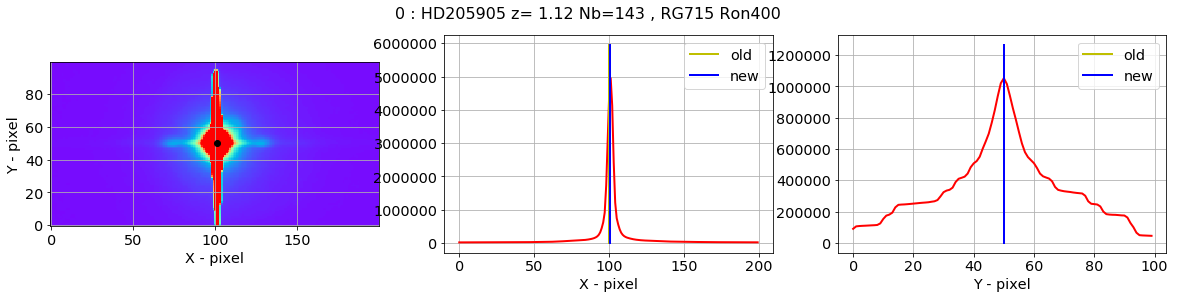

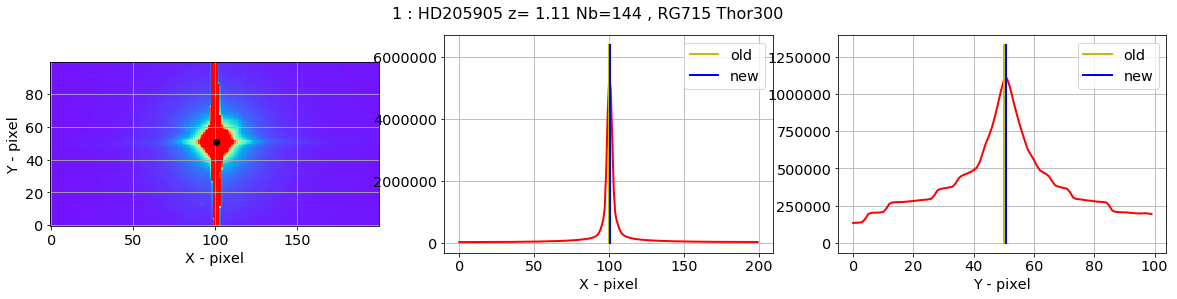

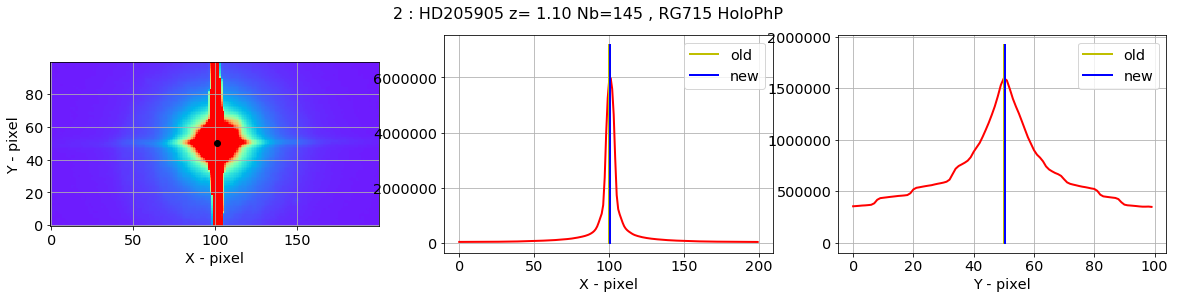

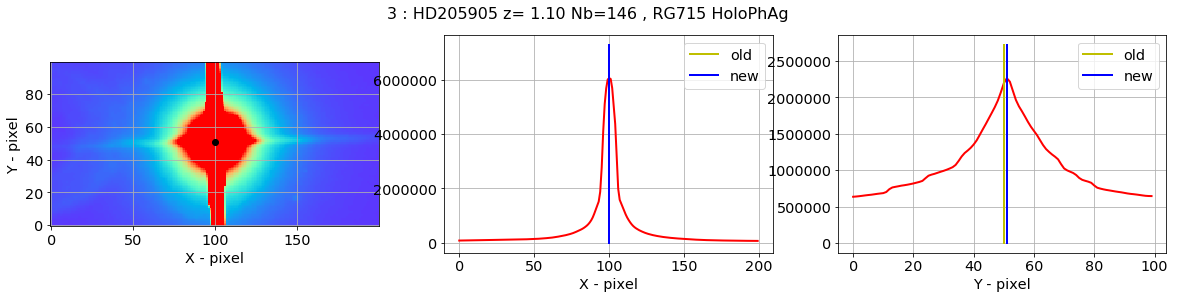

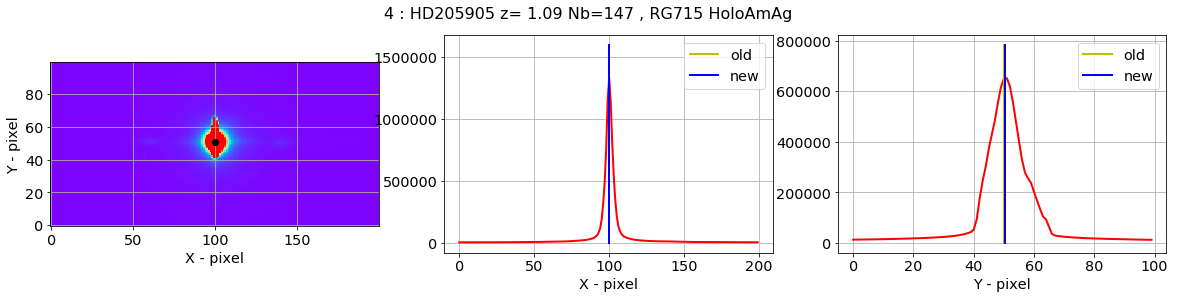

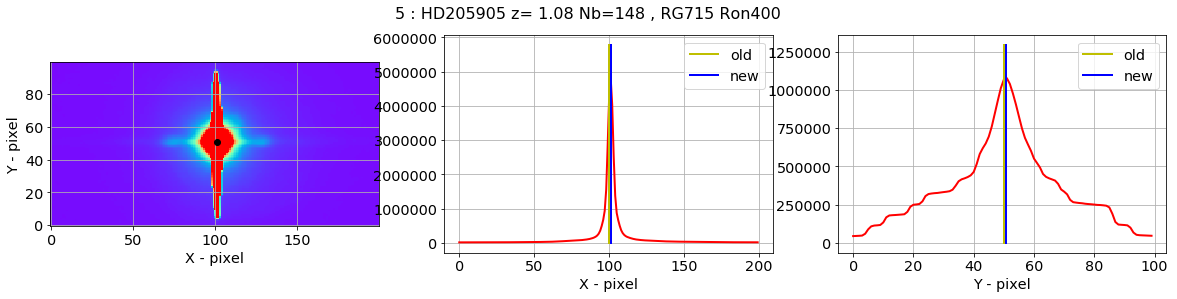

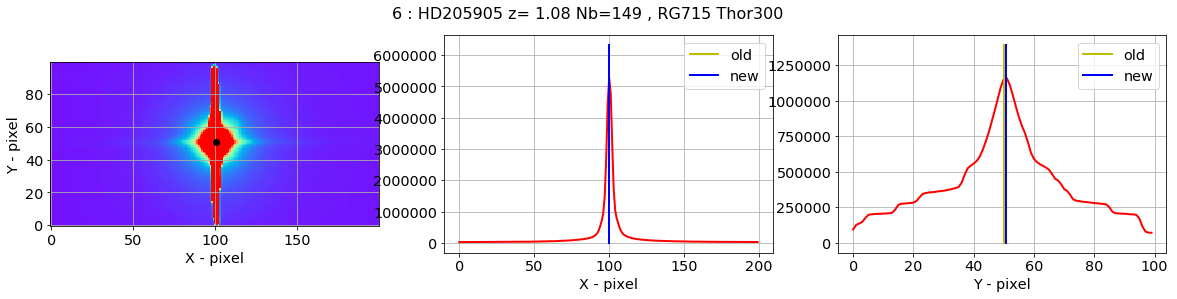

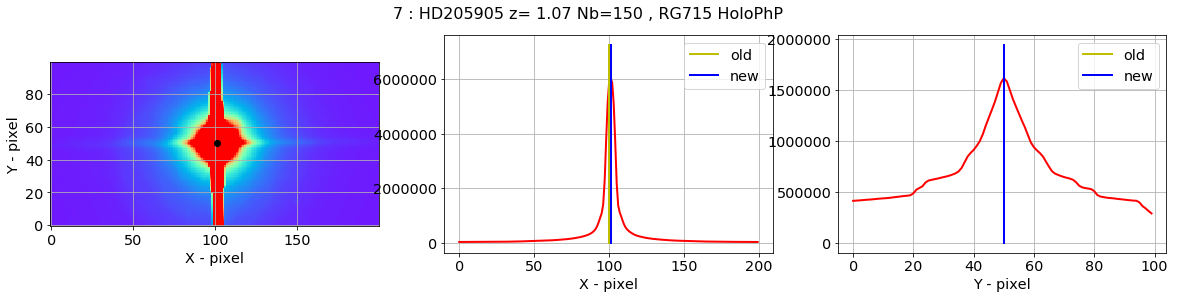

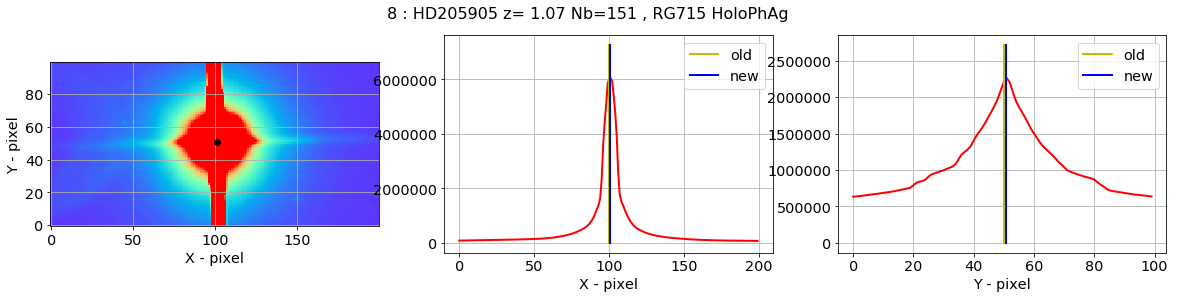

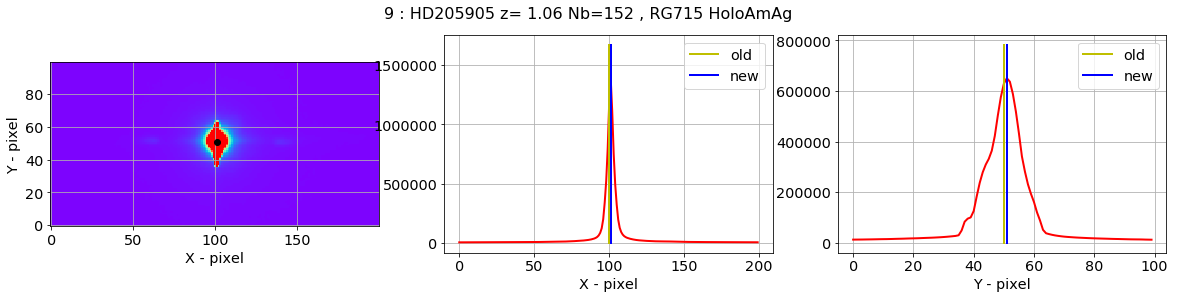

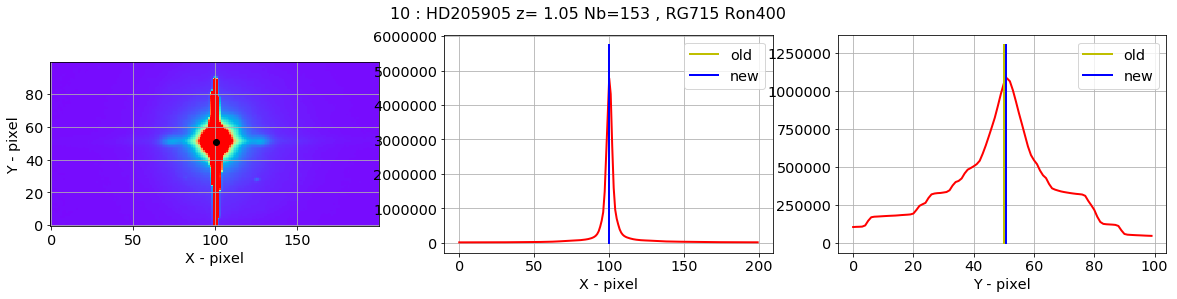

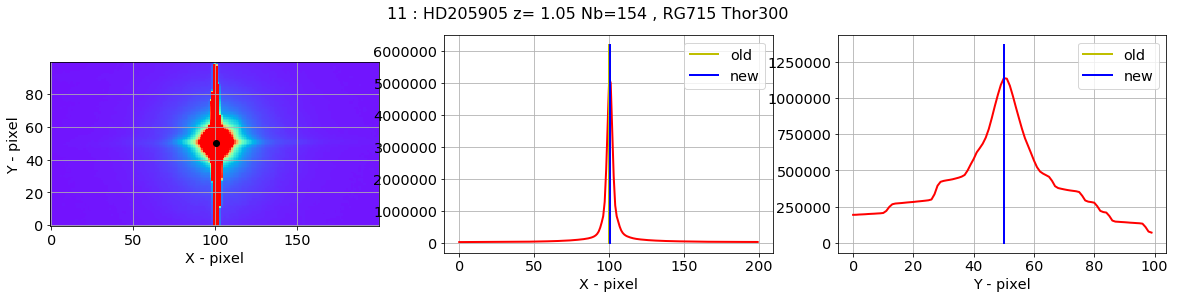

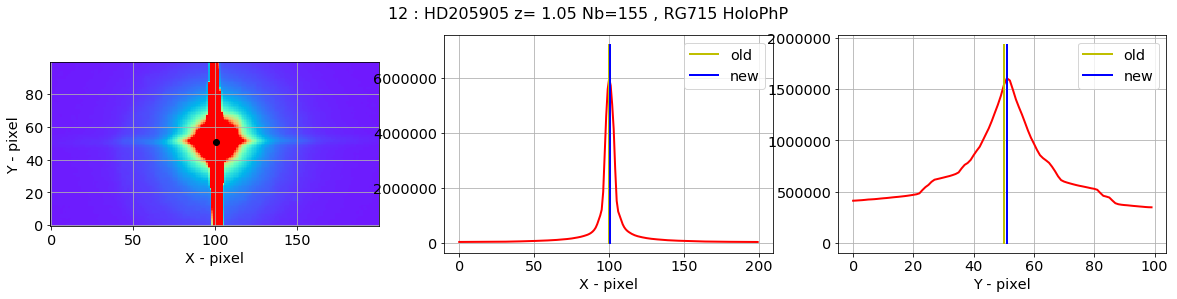

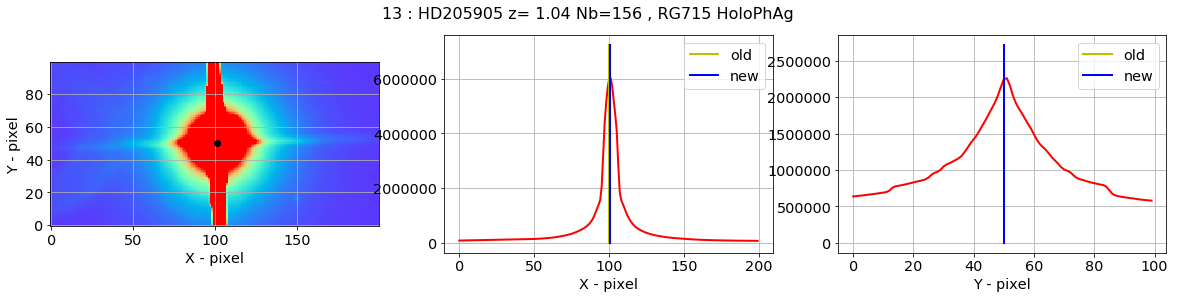

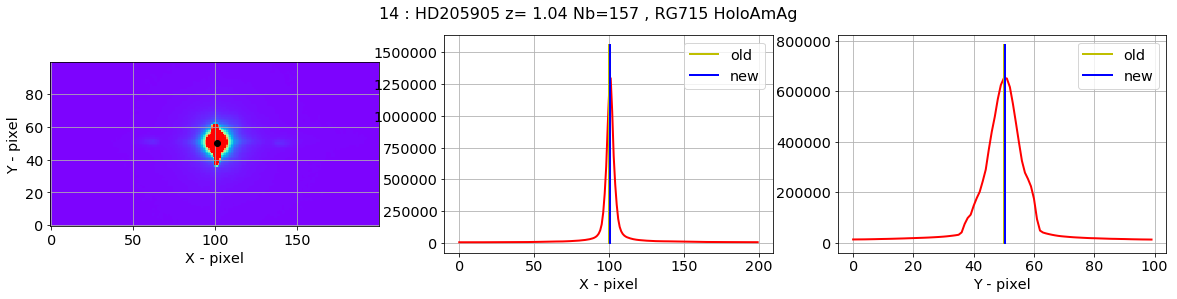

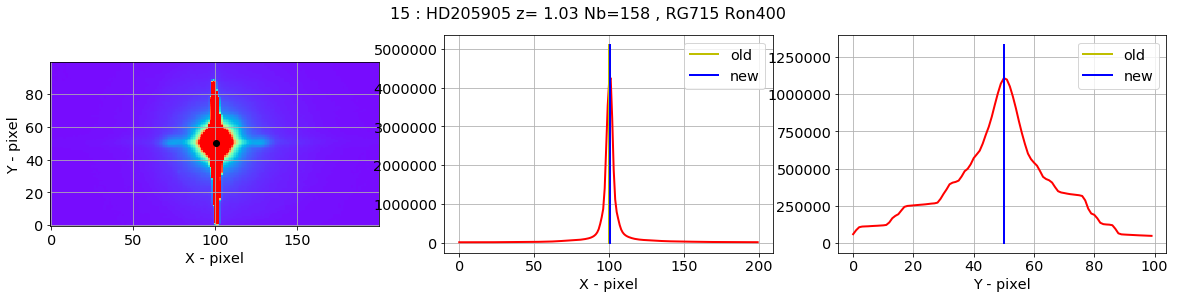

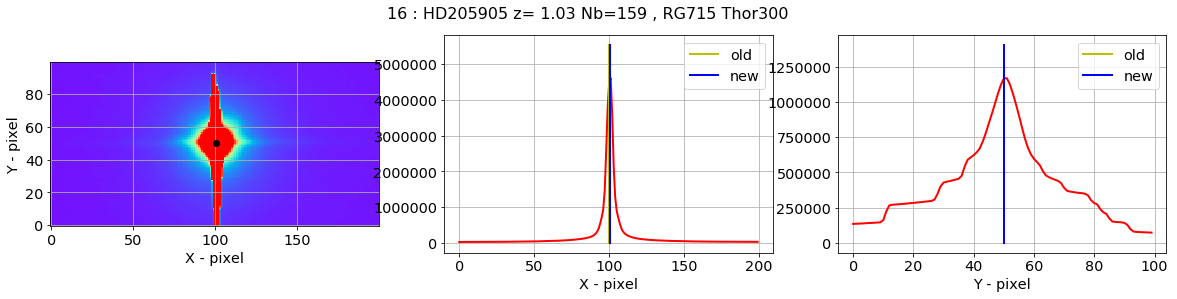

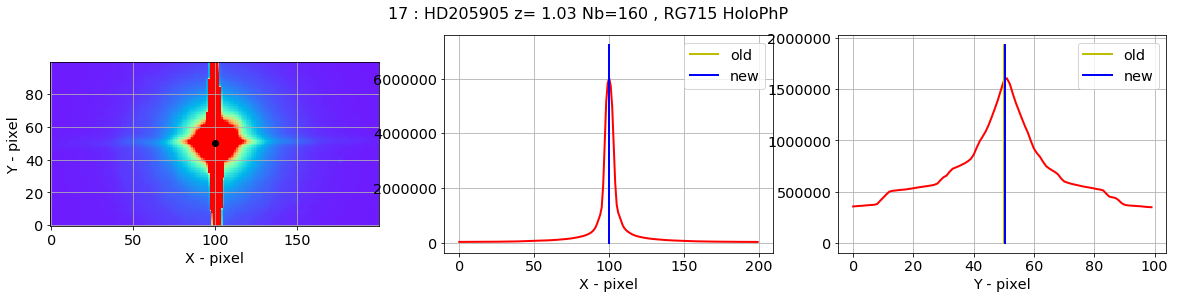

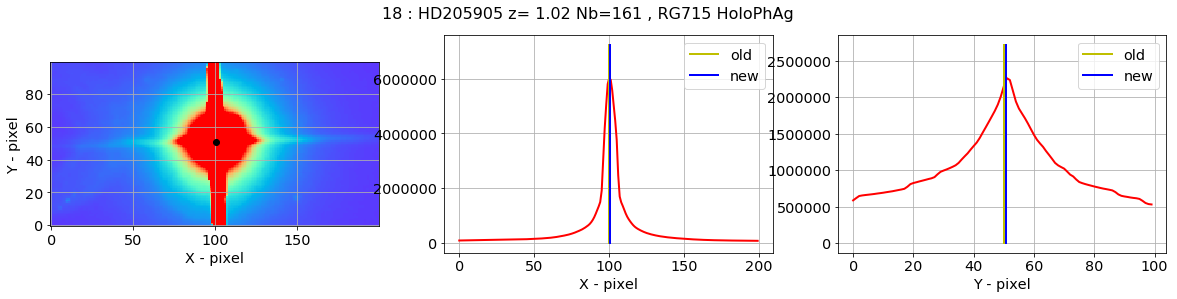

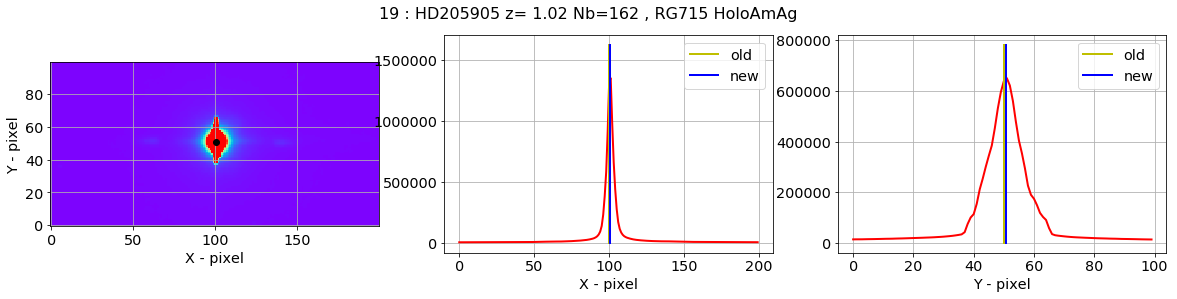

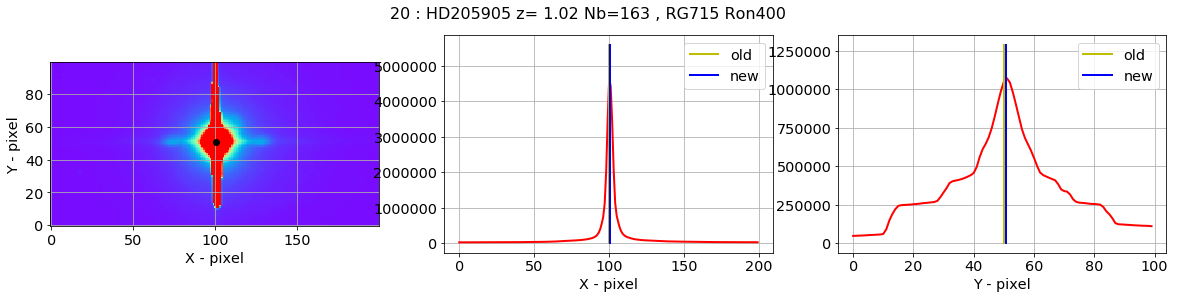

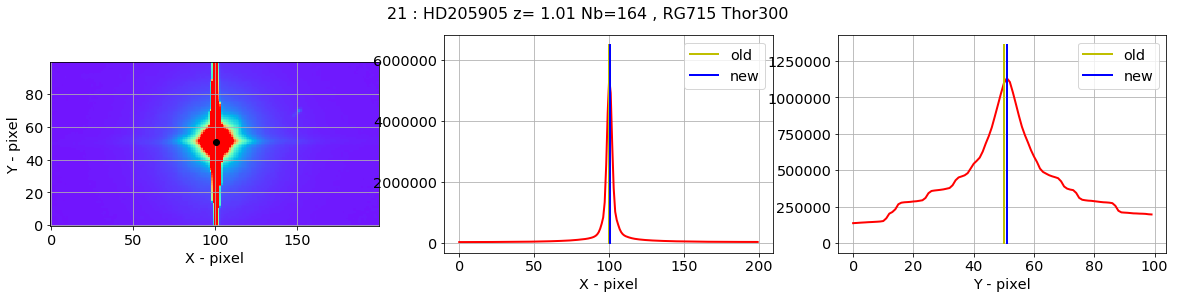

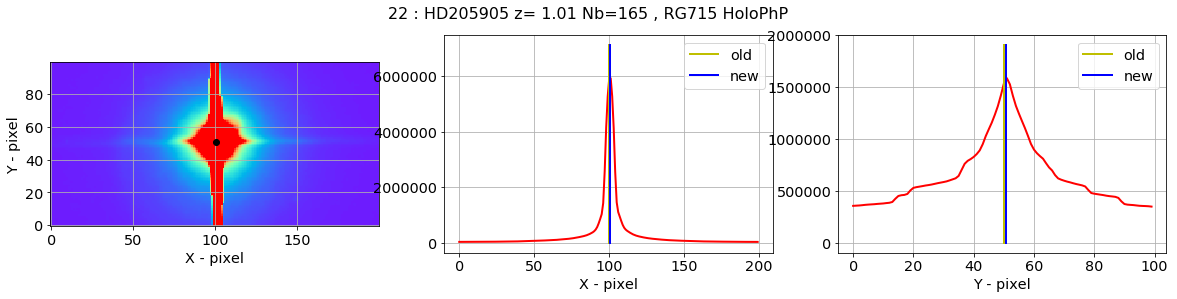

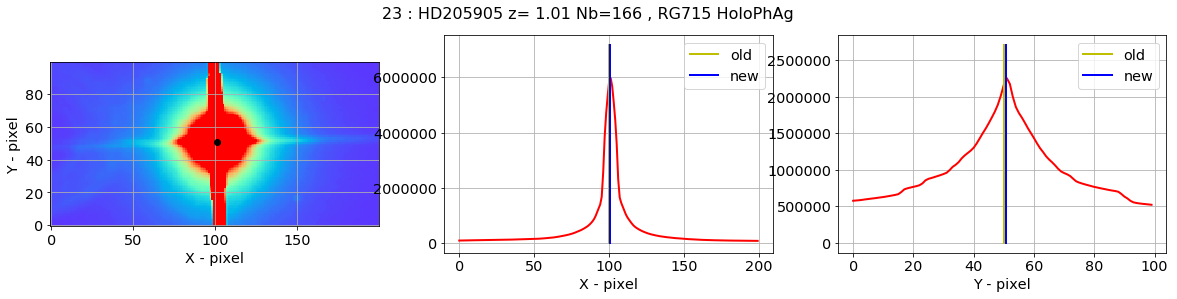

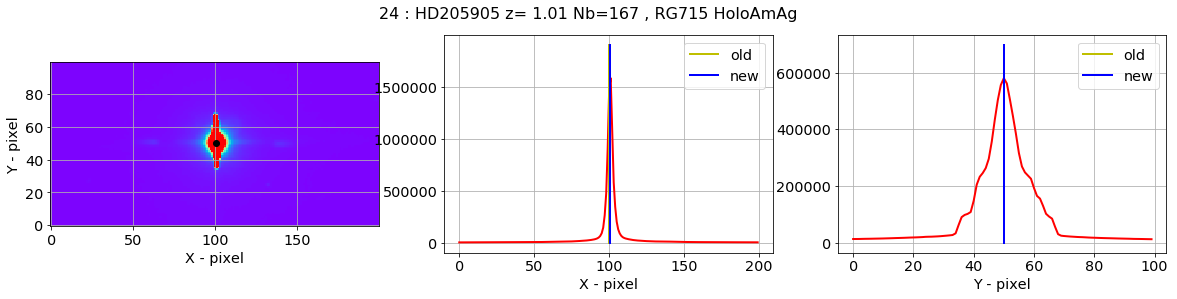

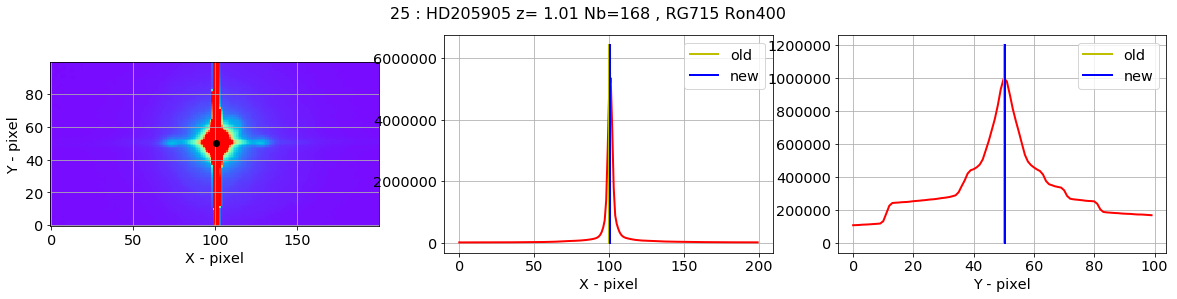

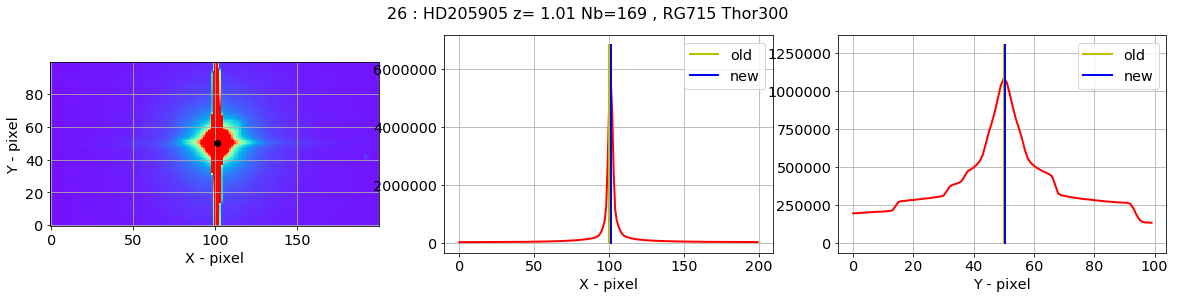

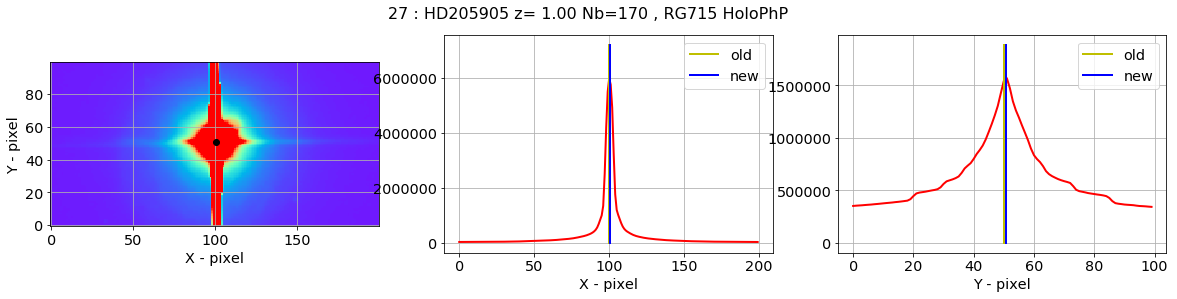

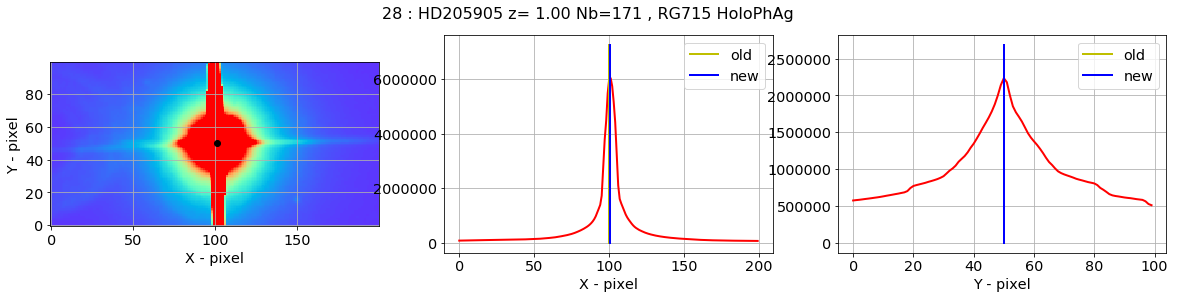

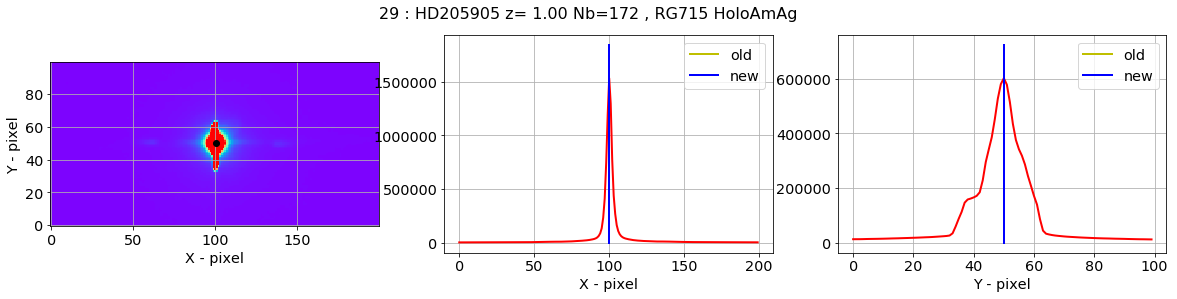

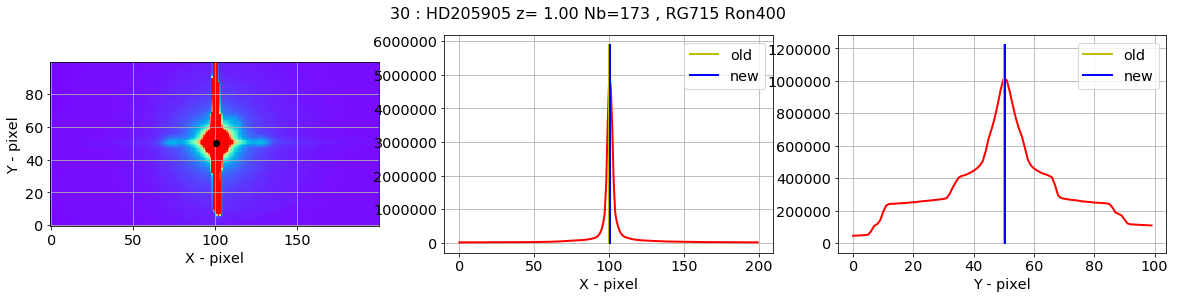

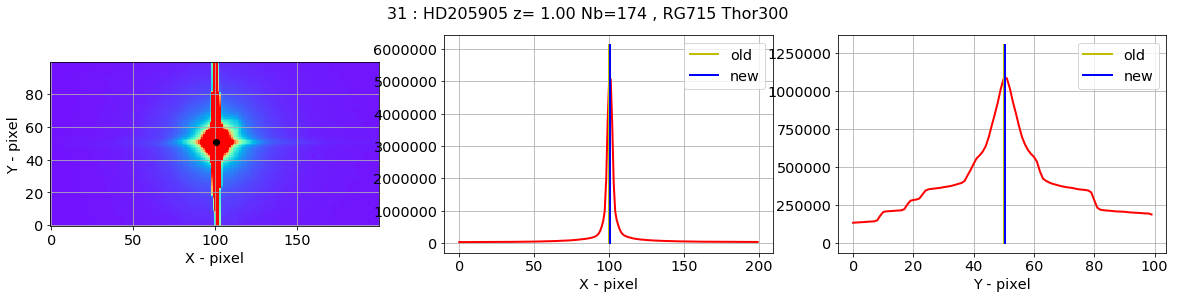

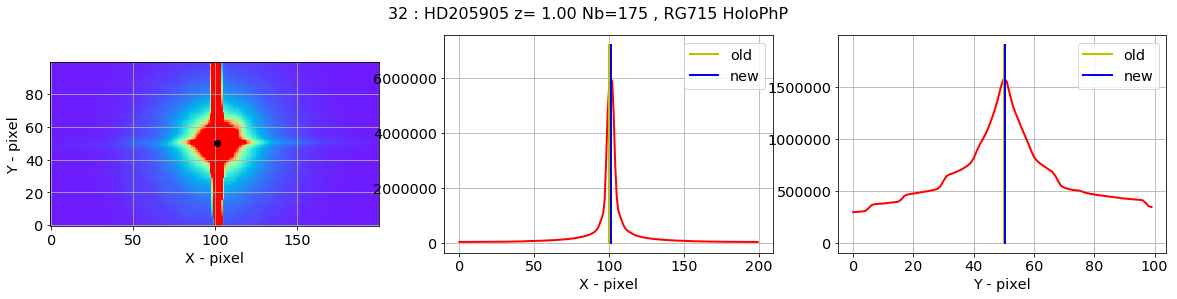

In [23]:
new_x_star,new_y_star=check_central_star(all_images,x_star2,y_star0,all_titles,all_filt)

## Zoom on the rotated image

In [24]:
# Right spectrum
#---------------
# start at star
#y_star0=[all_images[0].shape[0]/2]*len(all_images)
#x_star0=x_star

y_star0=new_y_star
x_star0=new_x_star

if ShowAllImageFirstOrderFlag:
    #ShowCenterImages([1300]*len(all_images),y_star0,[500]*len(all_images),[25]*len(all_images),
    #                all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
    ShowCenterImages(x_star0+400,y_star0,[600]*len(all_images),[30]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=200,target_pos=np.array([new_x_star,new_y_star]).T)

    title='Right part of spectrum of {} '.format(object_name)
    plt.suptitle(title,size=16)
    figfilename=os.path.join(dir_top_images,'rightorder.pdf')
    plt.savefig(figfilename)  

In [25]:
# Left spectrum
#--------------
#y_star0=[all_images[0].shape[0]/2]*len(all_images)
#x_star0=x_star-600

y_star0=new_y_star
x_star0=new_x_star

if ShowAllImageFirstOrderFlag:
    #ShowCenterImages([110]*len(all_images),[60]*len(all_images),[500]*len(all_images),[30]*len(all_images),
    #                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
    ShowCenterImages(x_star0-600,y_star0,[600]*len(all_images),[30]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=1000,target_pos=np.array([new_x_star,new_y_star]).T)
    title='Left part of spectrum of {} '.format(object_name)
    plt.suptitle(title,size=16)
    figfilename=os.path.join(dir_top_images,'leftorder.pdf')
    plt.savefig(figfilename)  

# Plot one contour

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


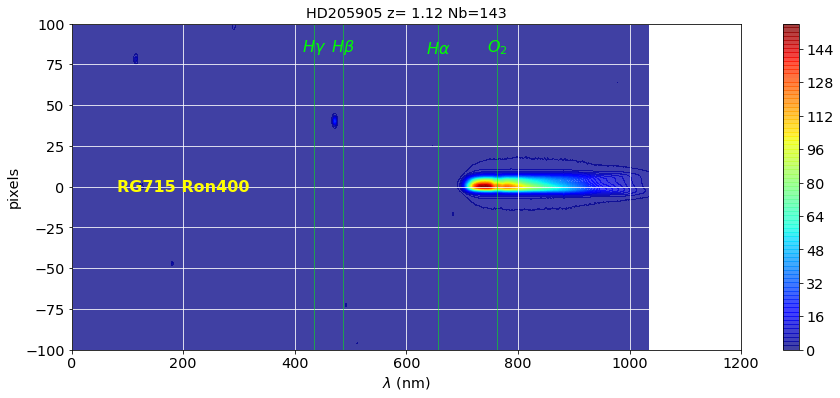

In [26]:
sel=0
ShowOneContourBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


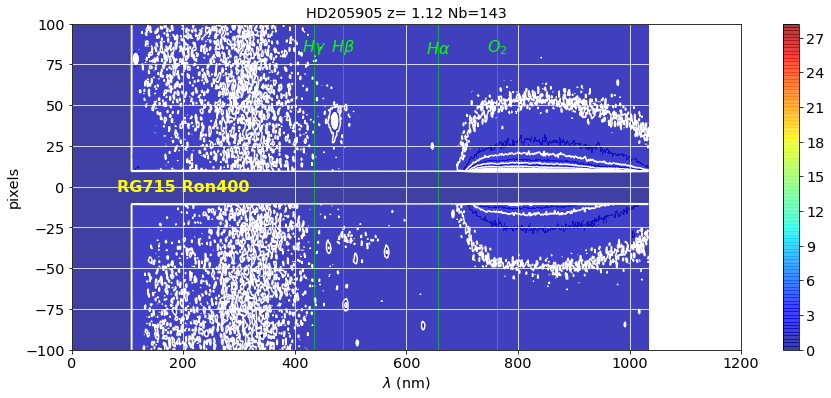

In [27]:
sel=0
ShowOneContourCutBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Thor300:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.6 degrees
Hologram center at x0 = 1398.0 and y0 = 1264.0 with average tilt of -0.6 degrees
Order  0 position at x0 = 1172.7 and y0 = 1266.3
Order +1 position at x0 = 1623.3 and y0 = 1261.7
Distance between the orders: 450.55 pixels (10.81 mm)


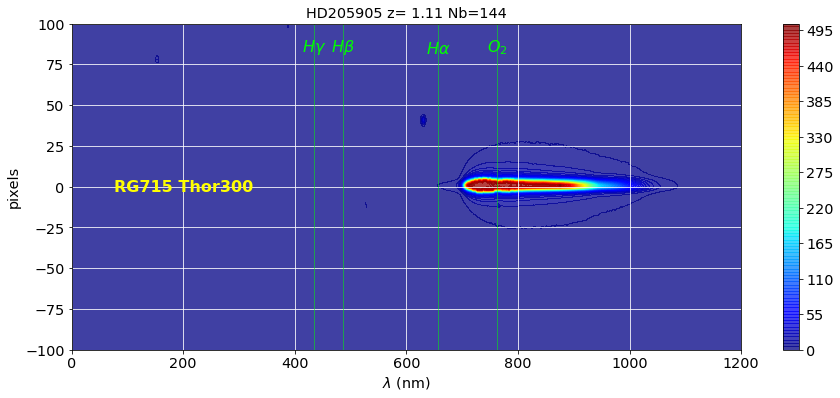

In [28]:
sel=1
ShowOneContourBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Thor300:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.6 degrees
Hologram center at x0 = 1398.0 and y0 = 1264.0 with average tilt of -0.6 degrees
Order  0 position at x0 = 1172.7 and y0 = 1266.3
Order +1 position at x0 = 1623.3 and y0 = 1261.7
Distance between the orders: 450.55 pixels (10.81 mm)


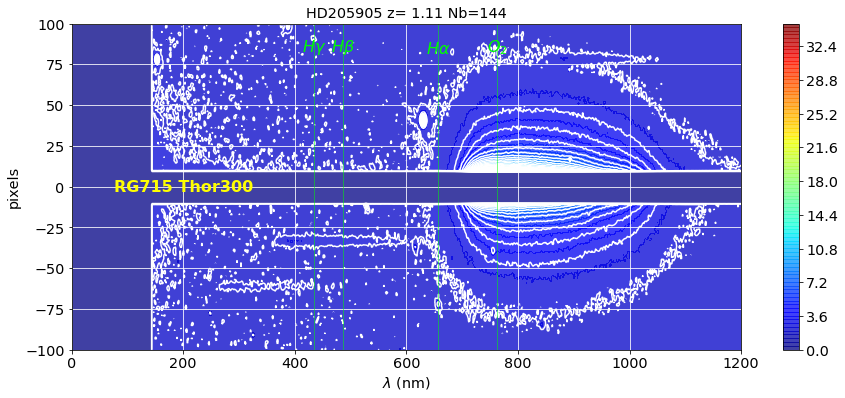

In [29]:
sel=1
ShowOneContourCutBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram HoloPhP:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


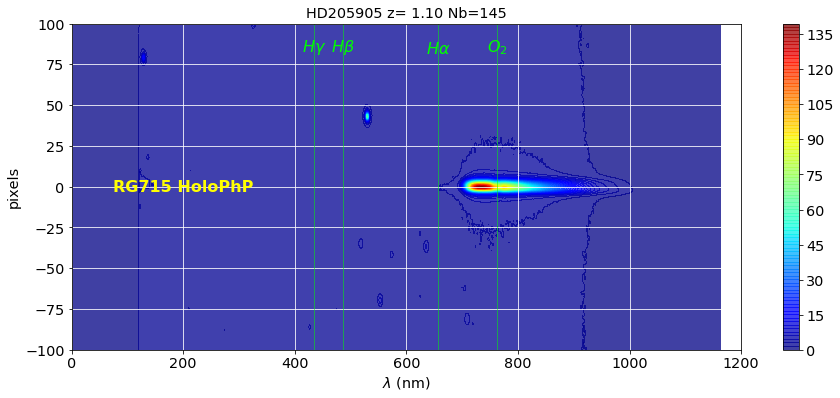

In [30]:
sel=2
ShowOneContourBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram HoloPhP:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.0 degrees
Hologram center at x0 = 856.0 and y0 = 562.3 with average tilt of -1.0 degrees
Order  0 position at x0 = 590.7 and y0 = 567.2
Order +1 position at x0 = 1121.3 and y0 = 557.5
Distance between the orders: 530.76 pixels (12.74 mm)


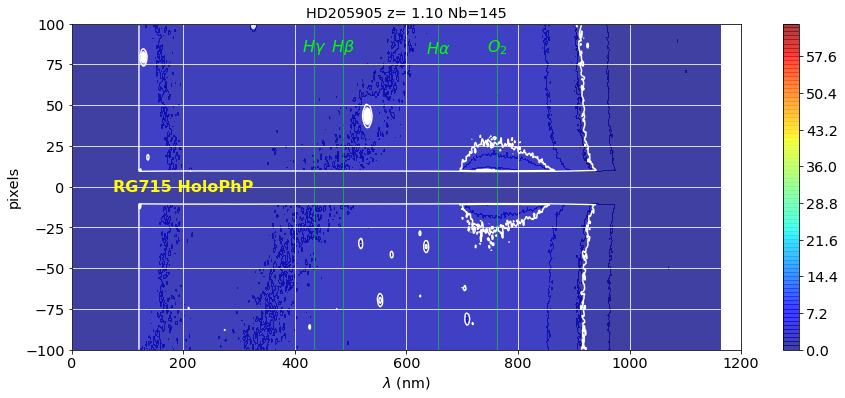

In [31]:
sel=2
ShowOneContourCutBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram HoloPhAg:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


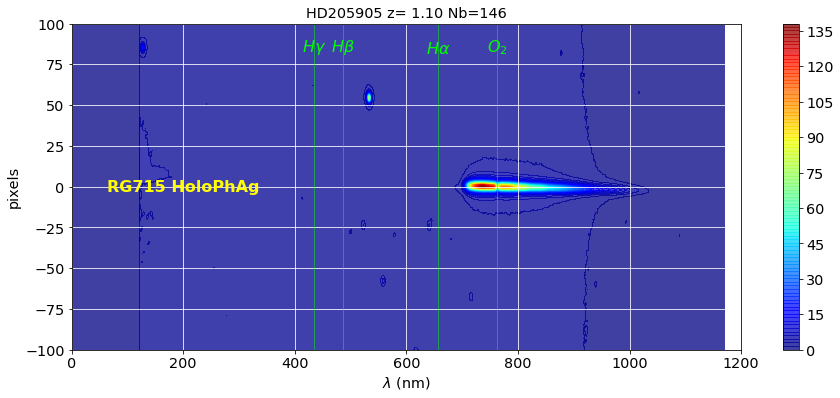

In [32]:
sel=3
ShowOneContourBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram HoloPhAg:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -1.9 degrees
Hologram center at x0 = 1044.2 and y0 = 606.7 with average tilt of -1.9 degrees
Order  0 position at x0 = 779.6 and y0 = 614.7
Order +1 position at x0 = 1308.7 and y0 = 598.7
Distance between the orders: 529.36 pixels (12.70 mm)


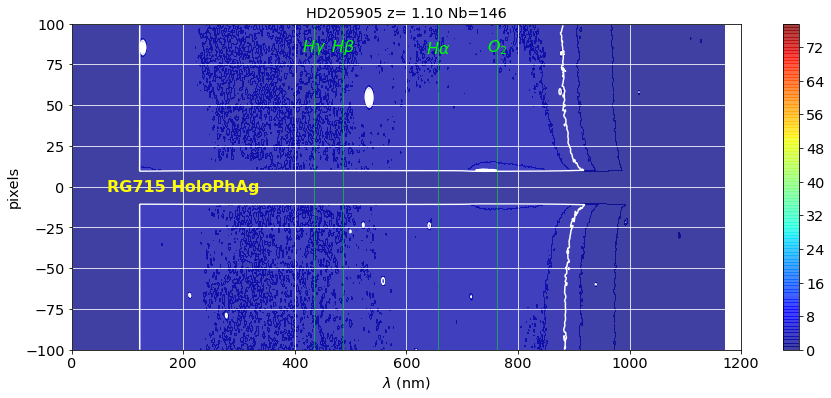

In [33]:
sel=3
ShowOneContourCutBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


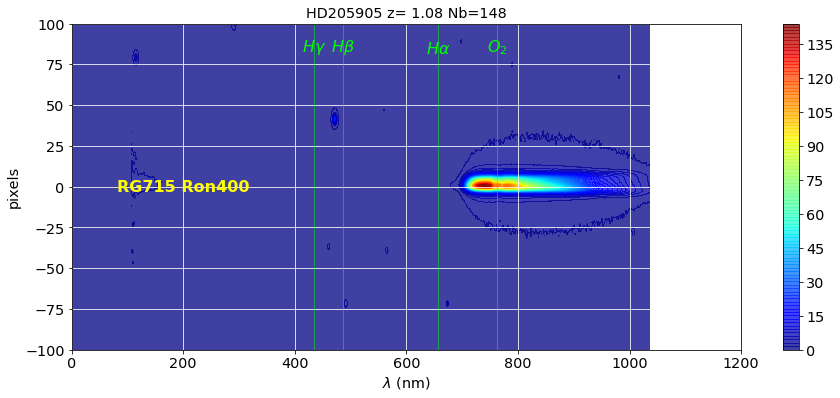

In [34]:
sel=5
ShowOneContourBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Ron400:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.3 degrees
Hologram center at x0 = 741.0 and y0 = 741.0 with average tilt of -0.3 degrees
Order  0 position at x0 = 435.0 and y0 = 742.5
Order +1 position at x0 = 1047.0 and y0 = 739.5
Distance between the orders: 611.97 pixels (14.69 mm)


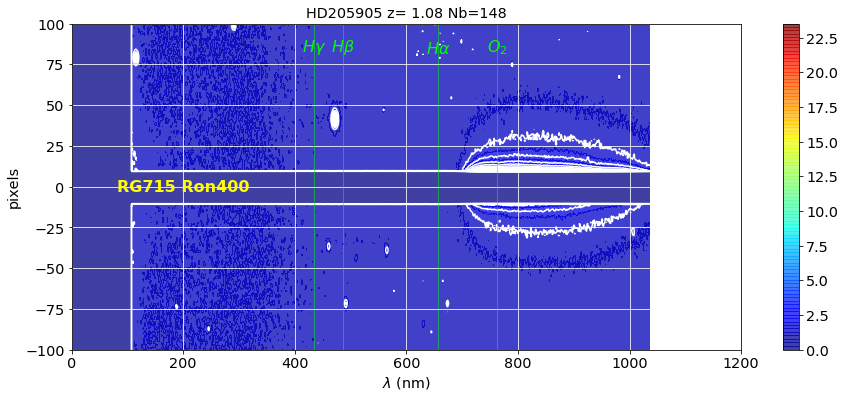

In [35]:
sel=5
ShowOneContourCutBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Thor300:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.6 degrees
Hologram center at x0 = 1398.0 and y0 = 1264.0 with average tilt of -0.6 degrees
Order  0 position at x0 = 1172.7 and y0 = 1266.3
Order +1 position at x0 = 1623.3 and y0 = 1261.7
Distance between the orders: 450.55 pixels (10.81 mm)


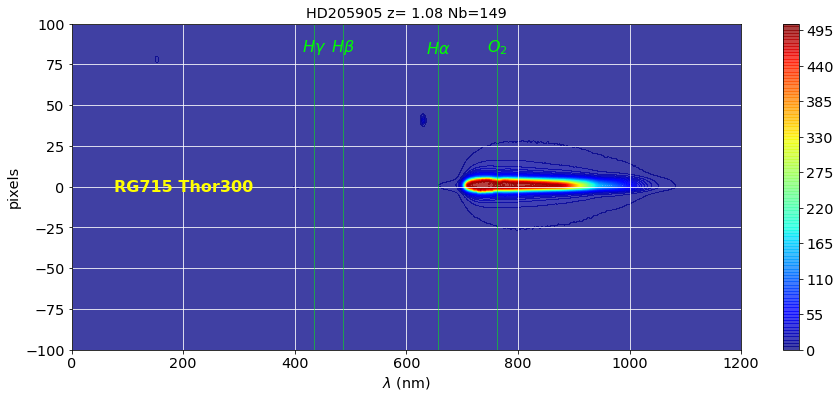

In [36]:
sel=6
ShowOneContourBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

Load hologram Thor300:
Plate center at x0 = 774.0 and y0 = 690.7 with average tilt of -0.6 degrees
Hologram center at x0 = 1398.0 and y0 = 1264.0 with average tilt of -0.6 degrees
Order  0 position at x0 = 1172.7 and y0 = 1266.3
Order +1 position at x0 = 1623.3 and y0 = 1261.7
Distance between the orders: 450.55 pixels (10.81 mm)


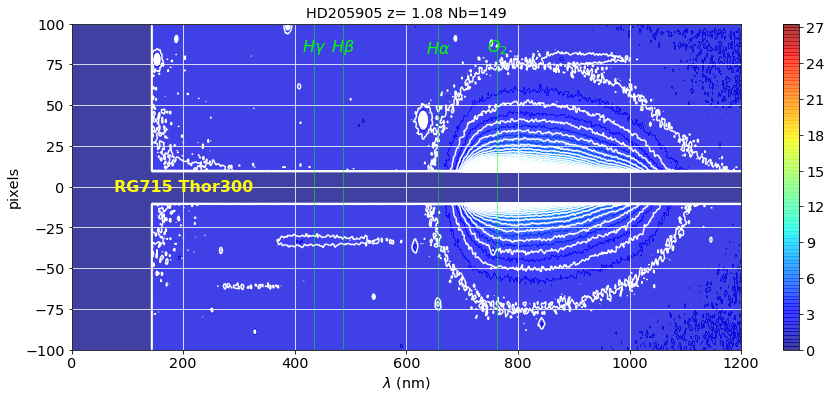

In [37]:
sel=6
ShowOneContourCutBKG(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

pdf Page written  1


/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


pdf Page written  2
pdf Page written  3
Final pdf Page written  3


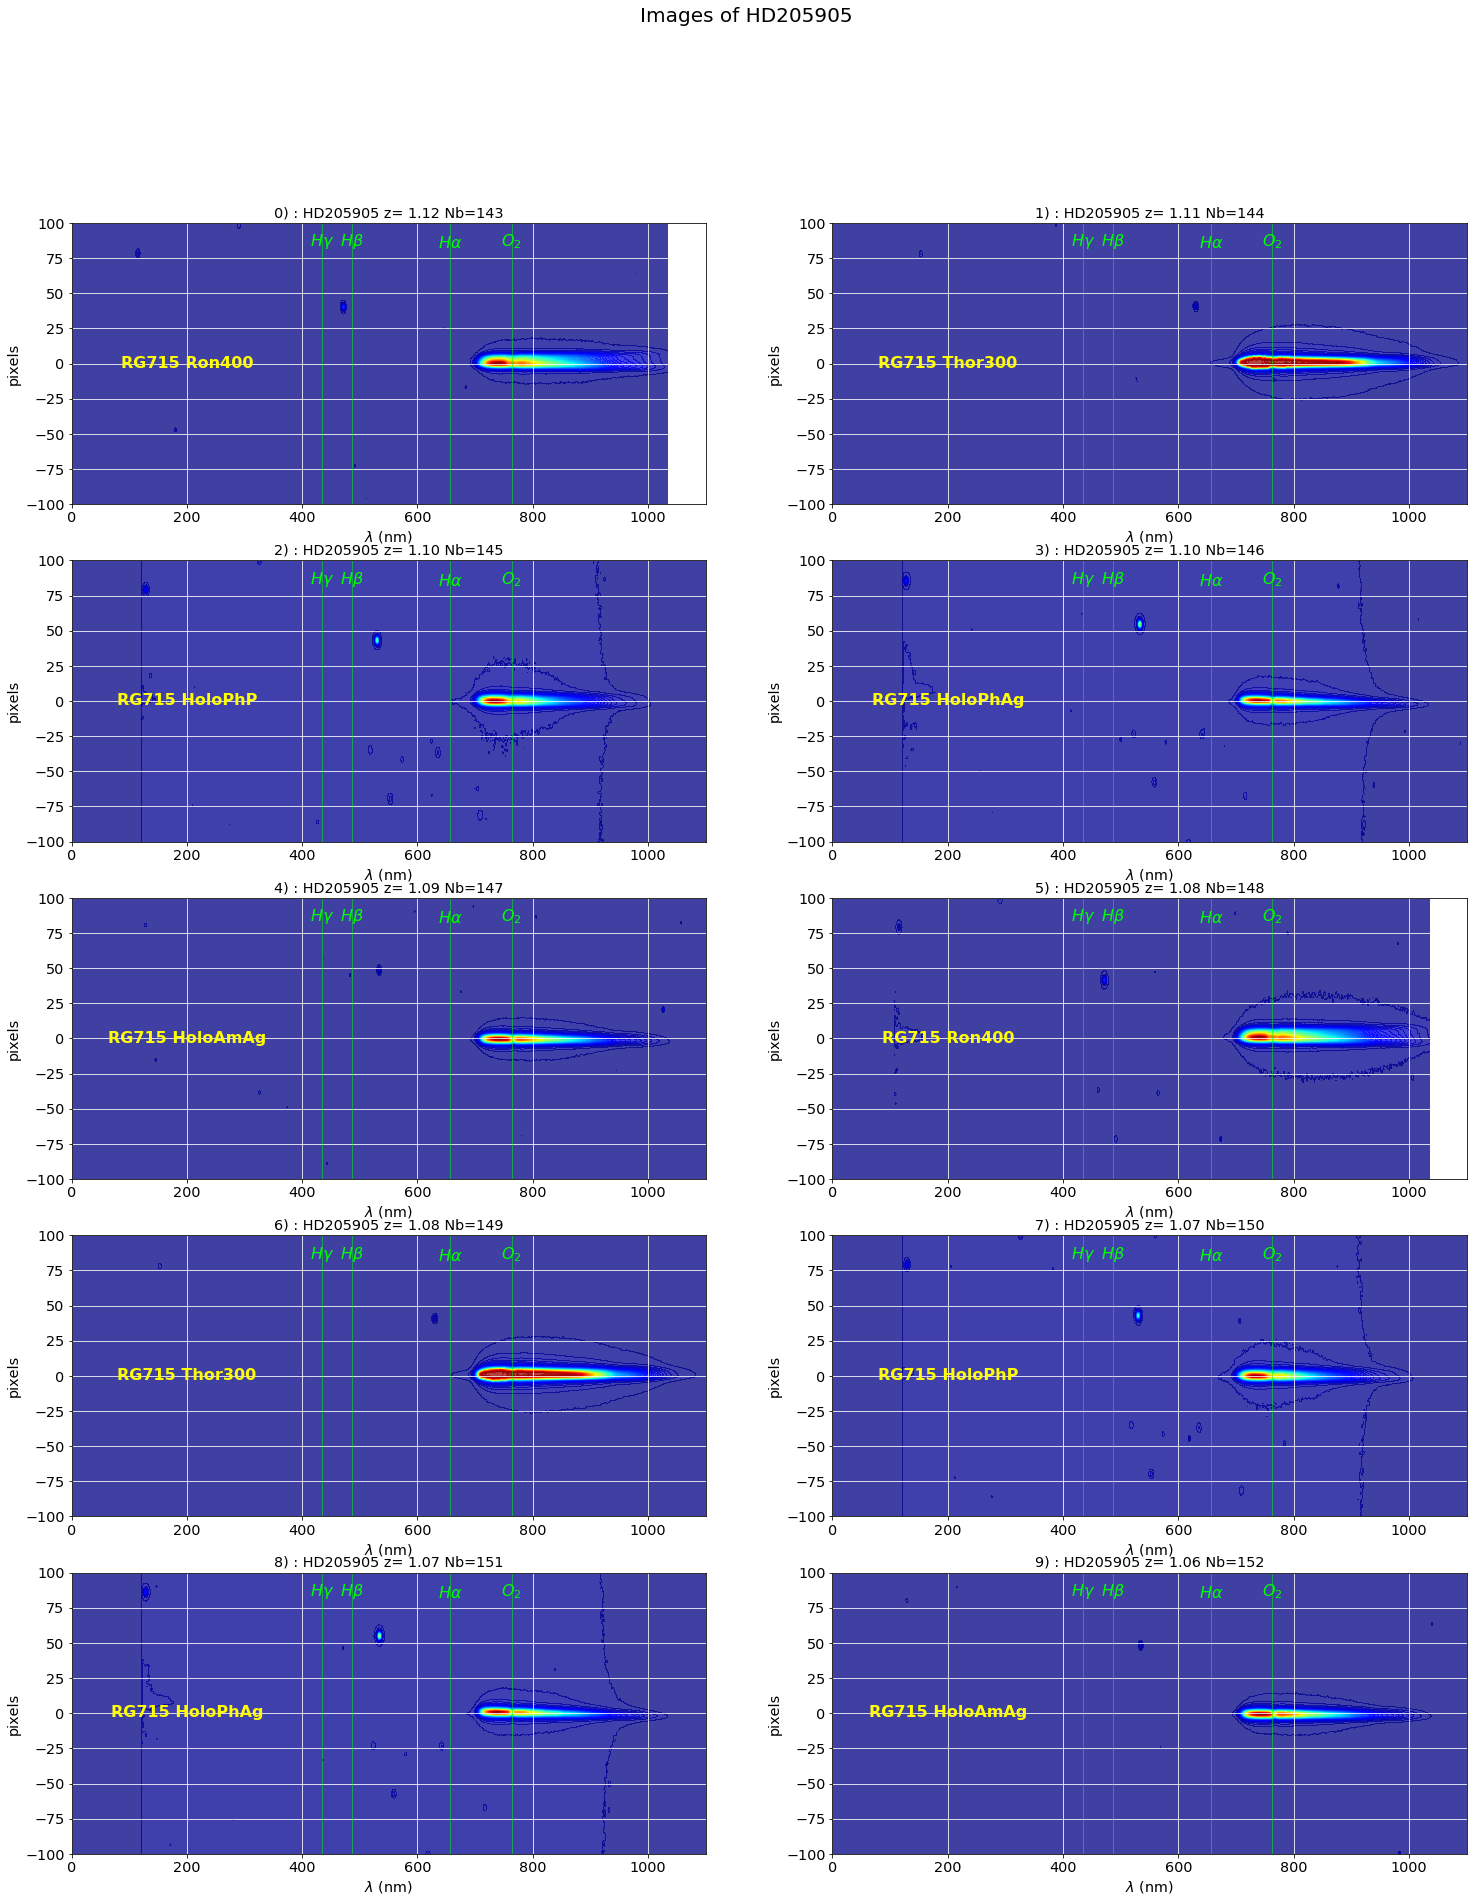

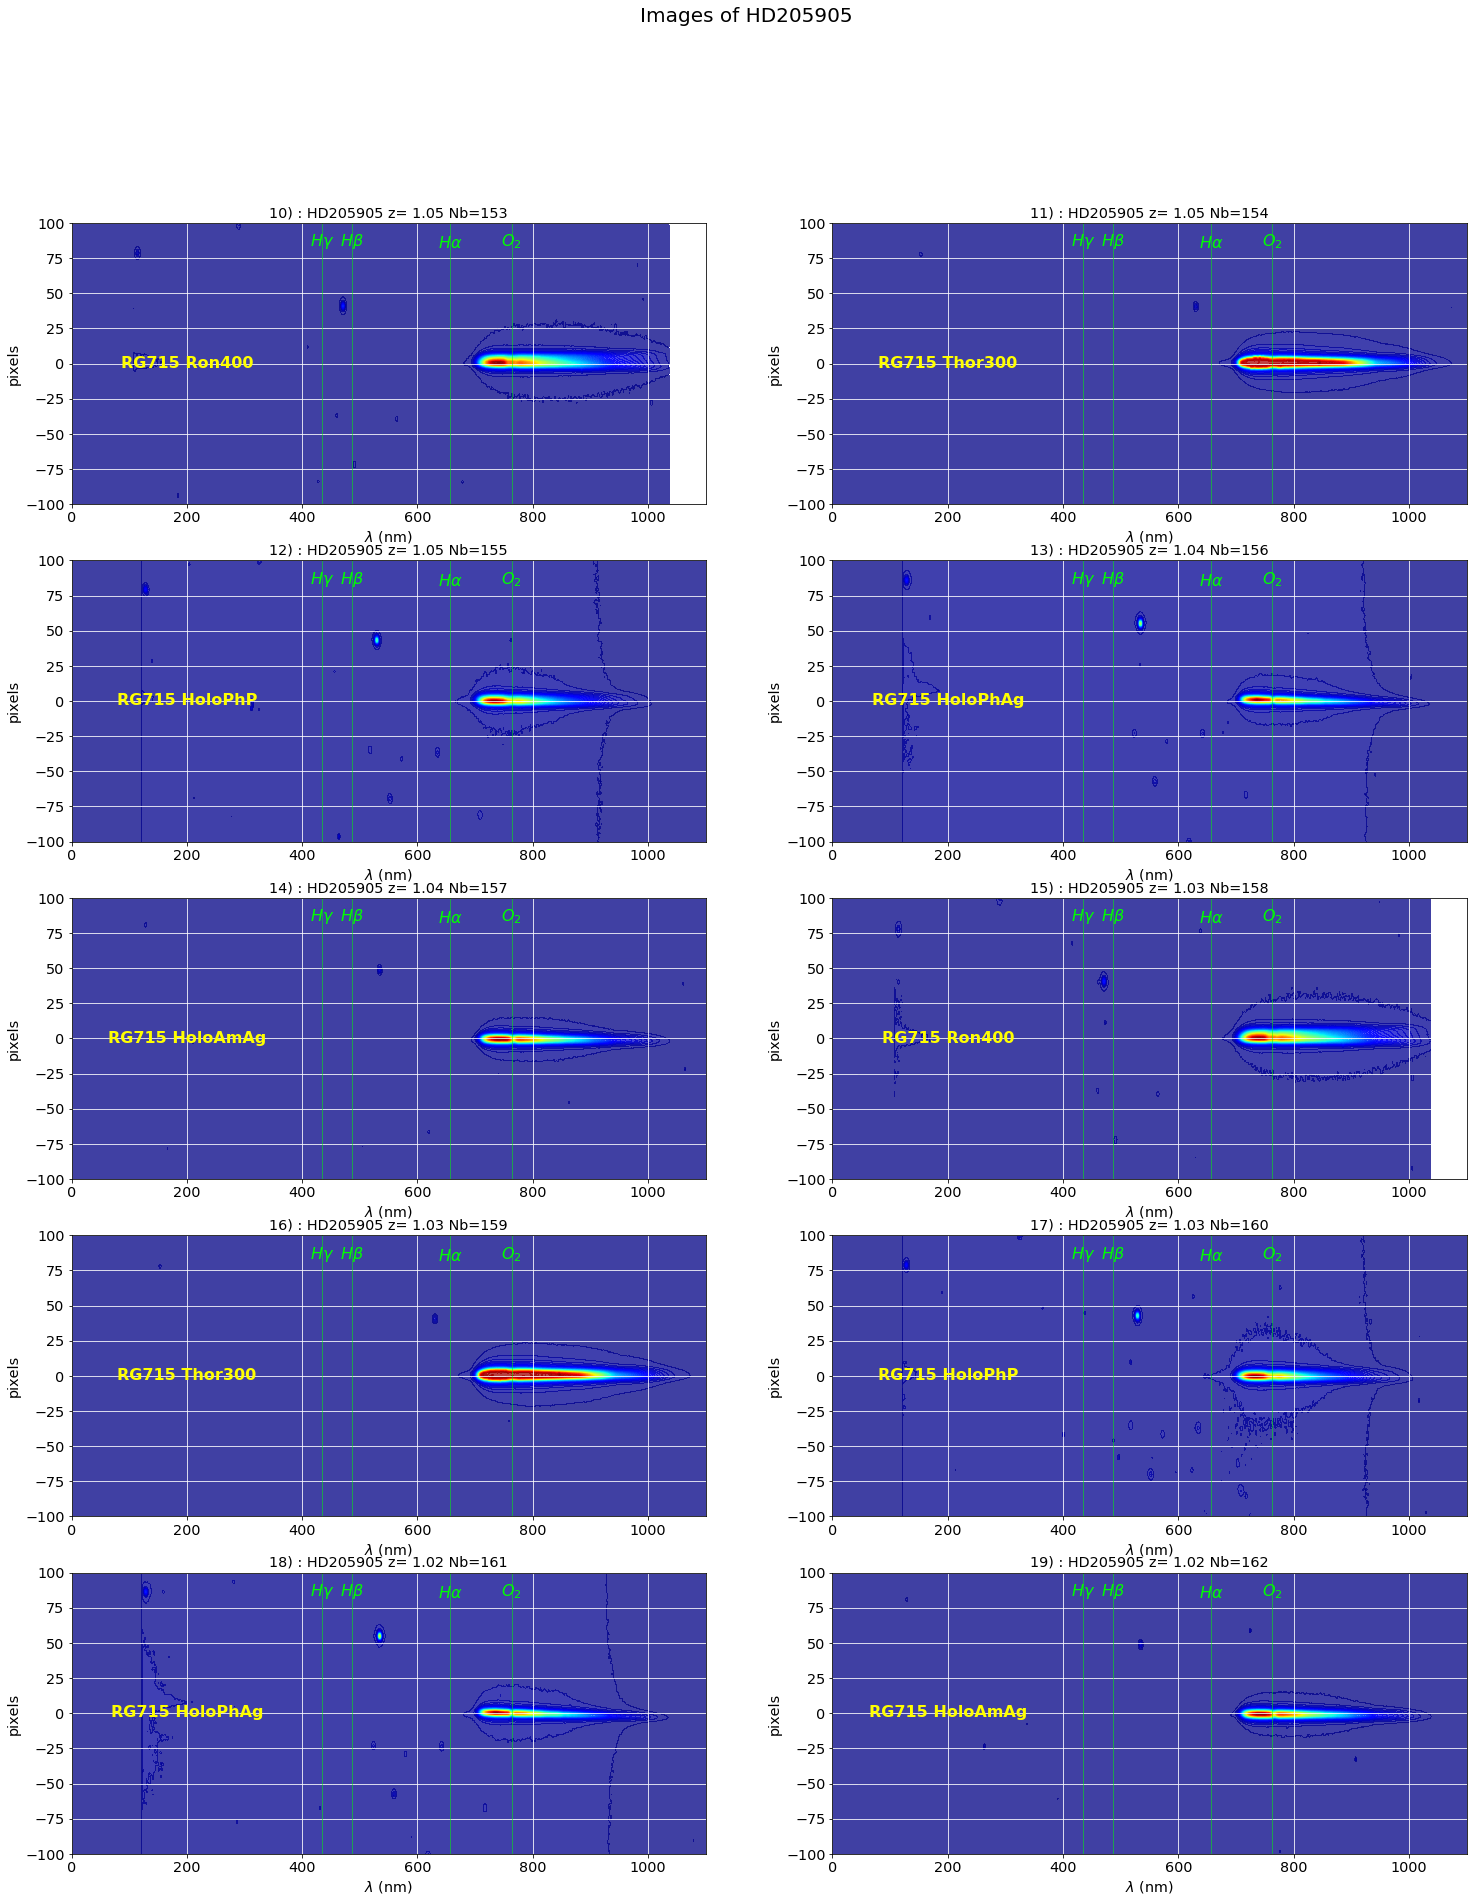

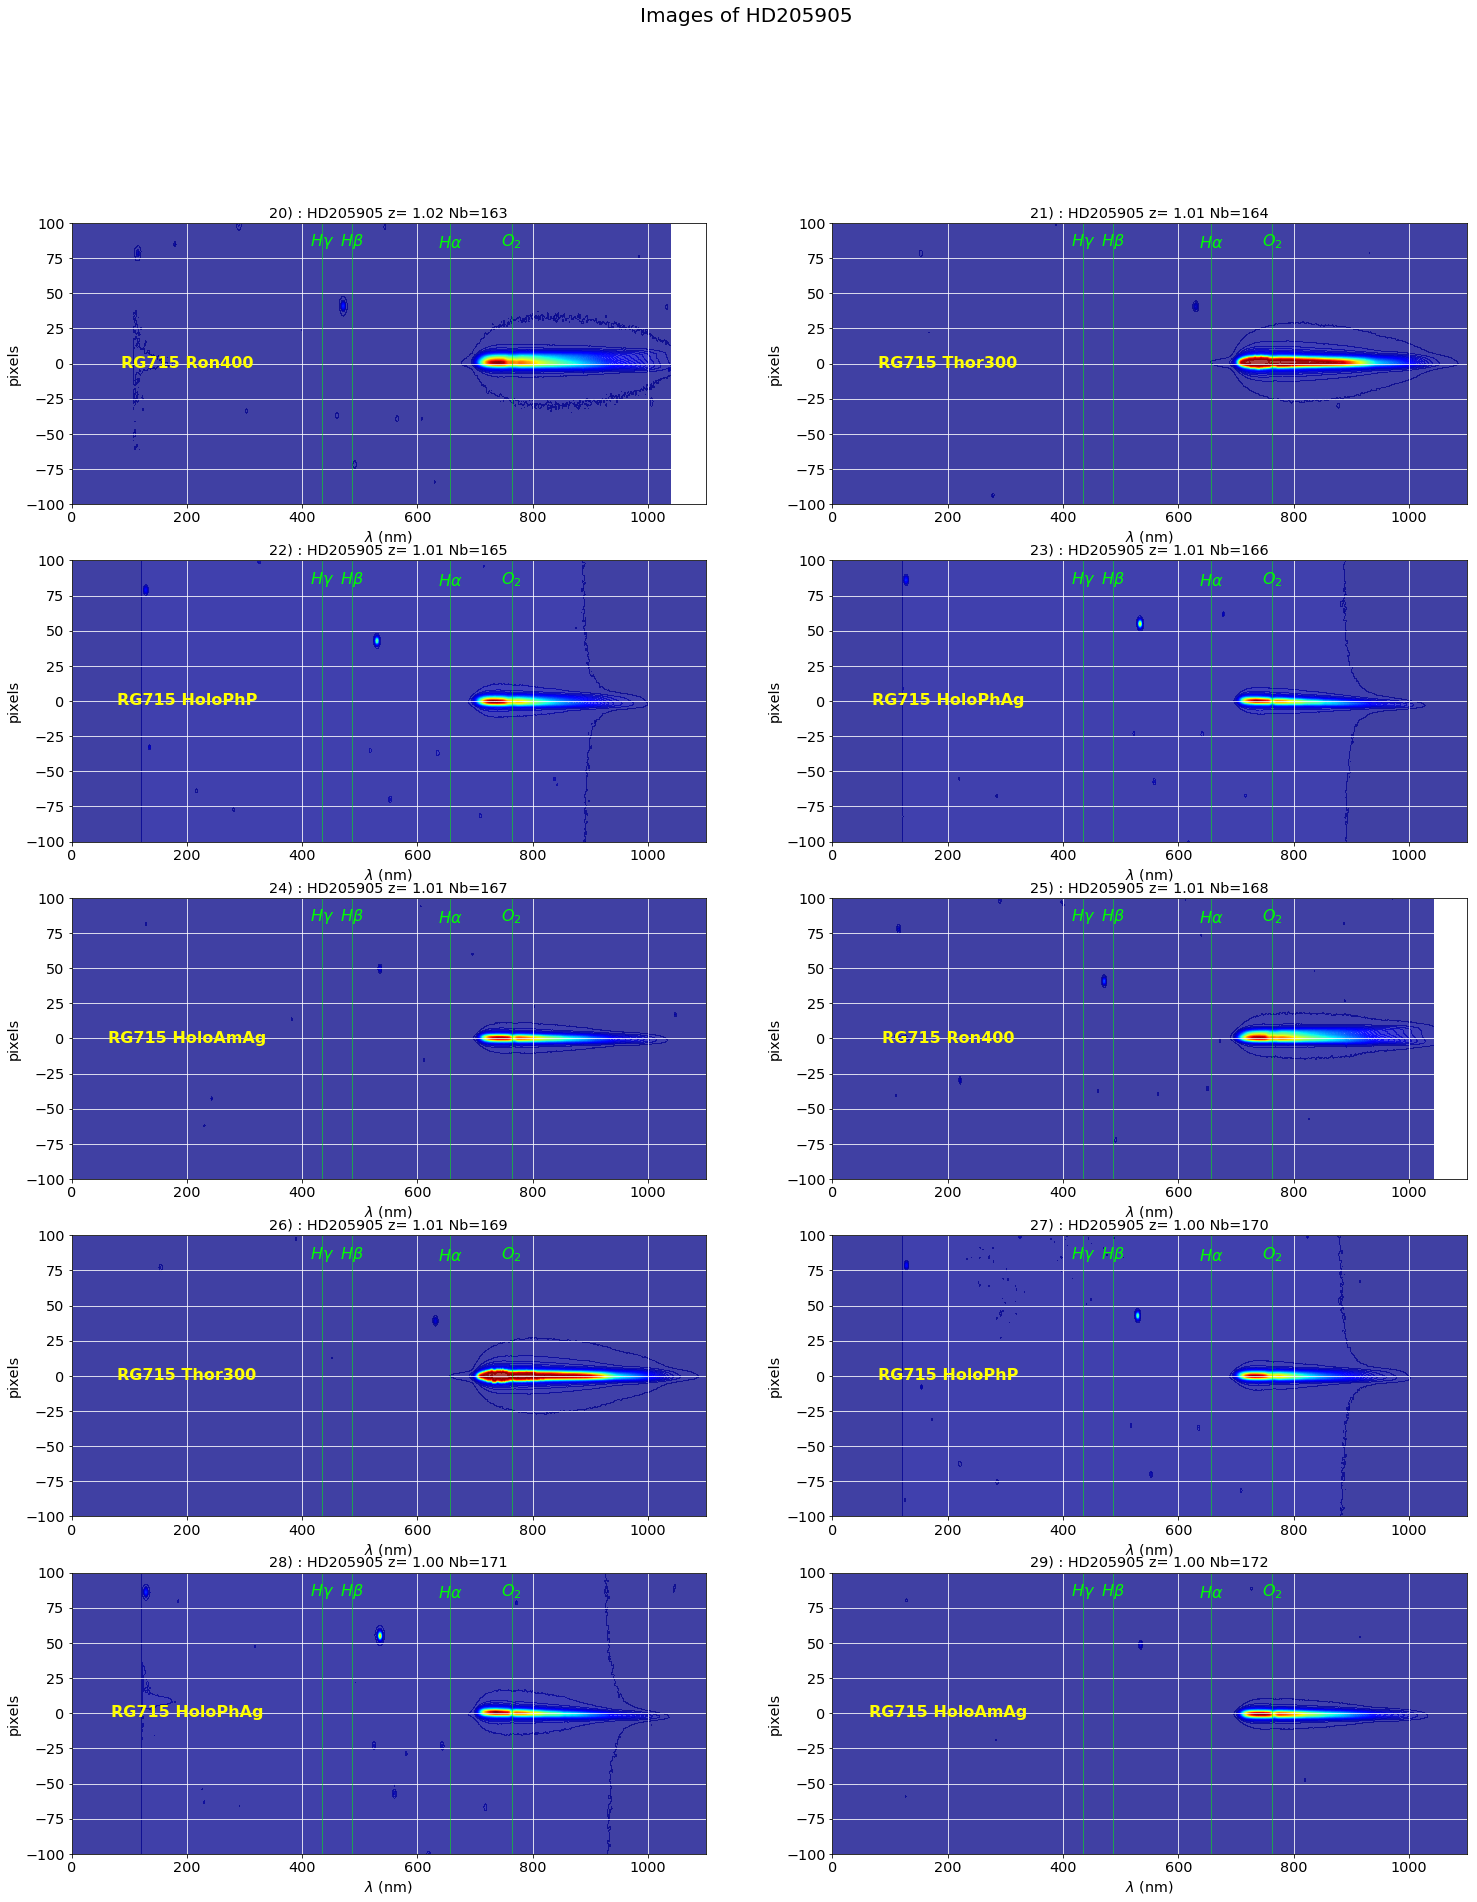

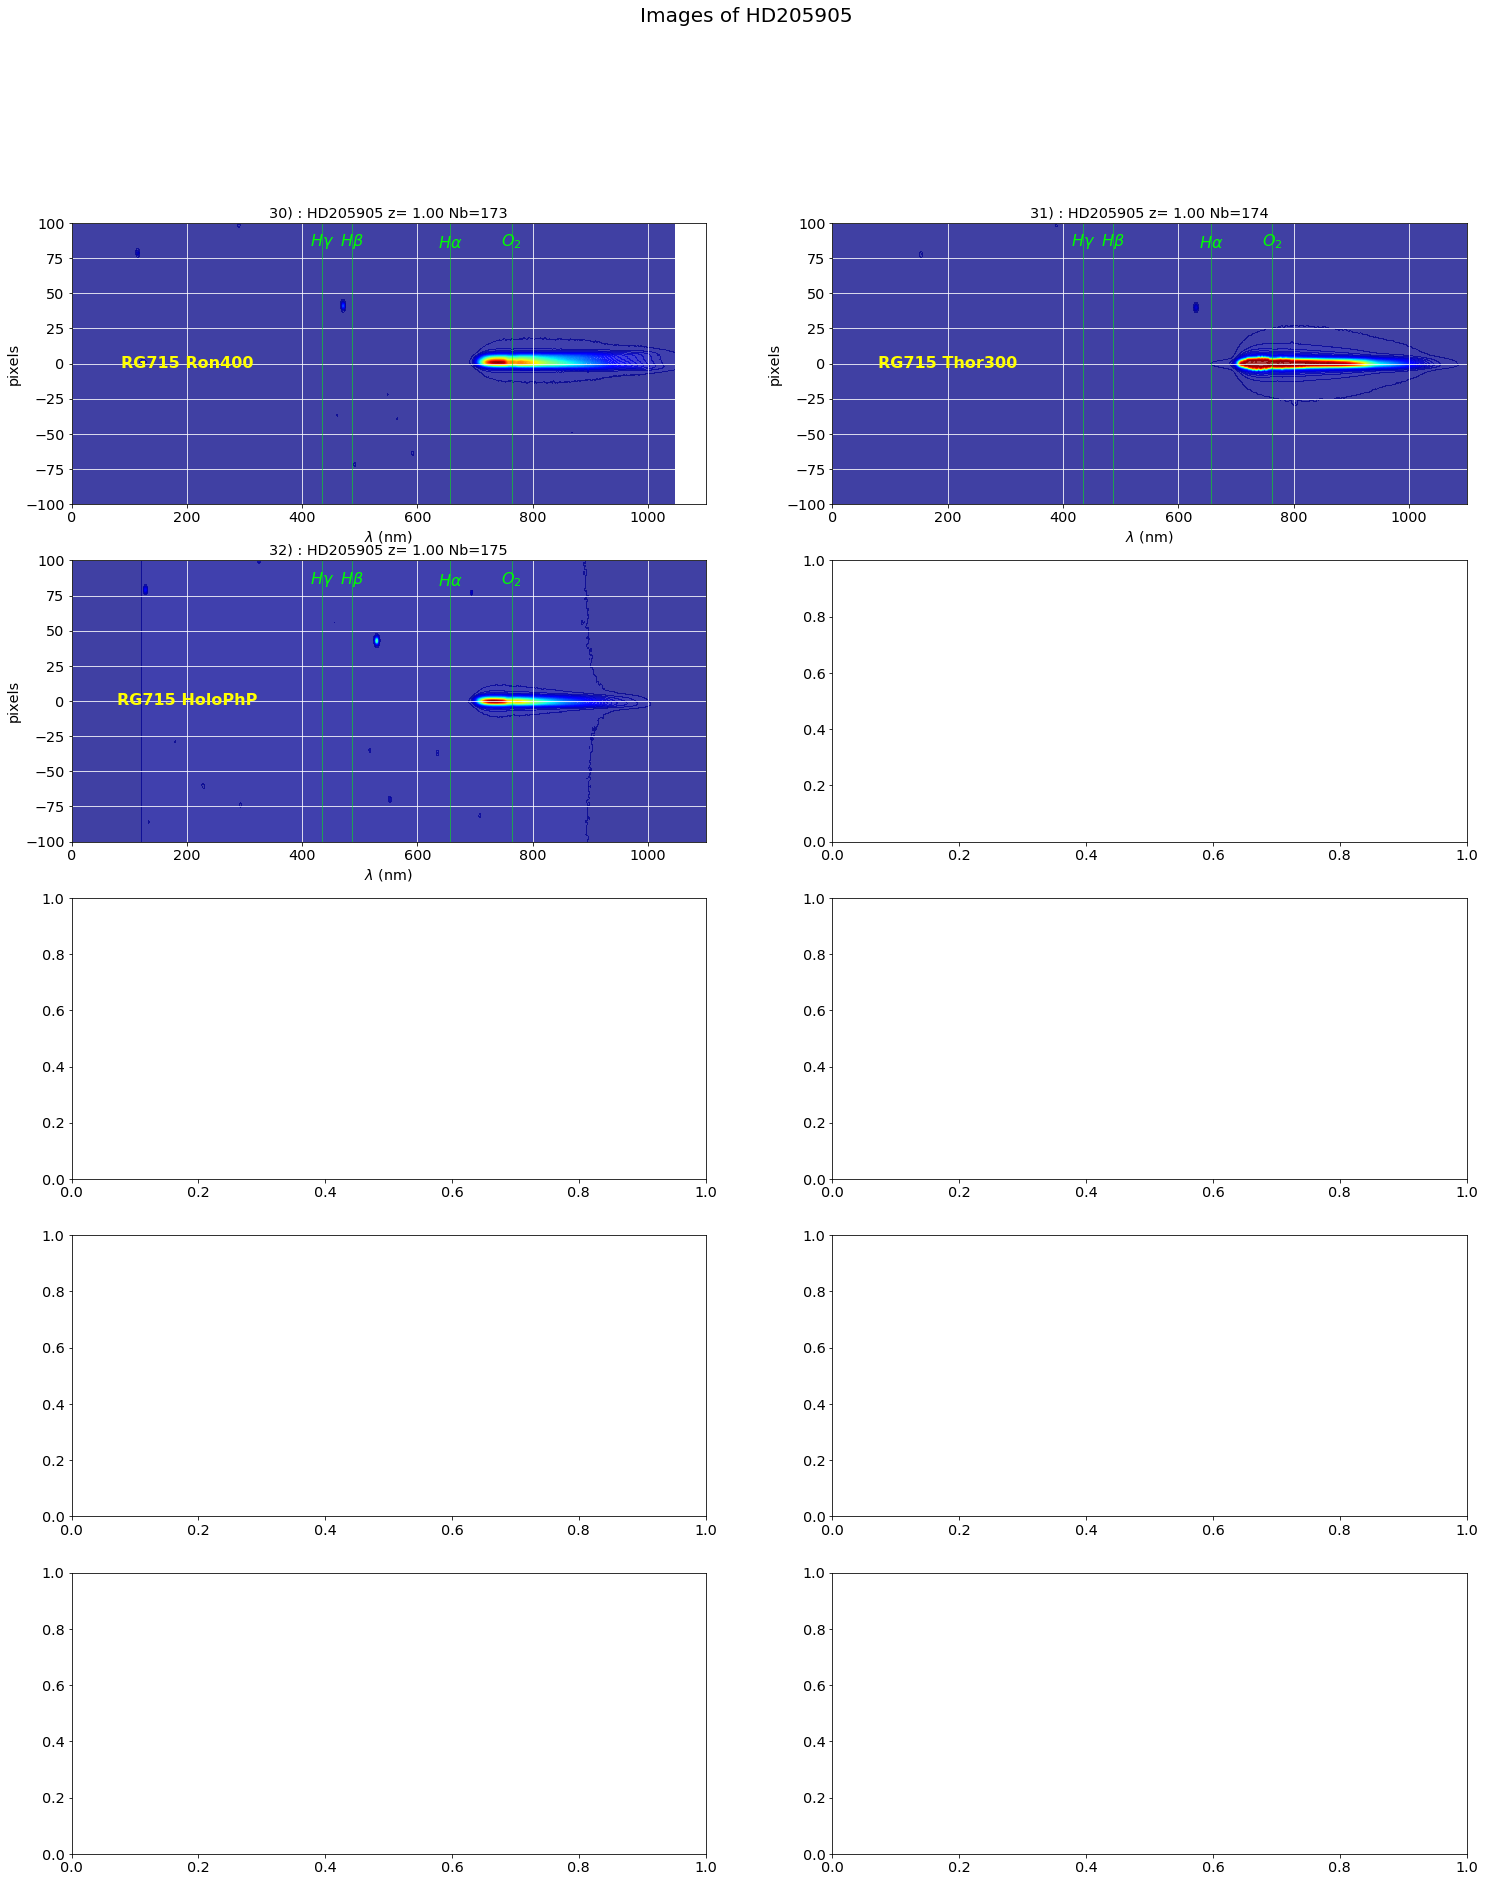

In [38]:
ShowOneOrder_contourBKG(all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'firstorderright_contour.pdf')

pdf Page written  1
pdf Page written  2
pdf Page written  3
Final pdf Page written  3


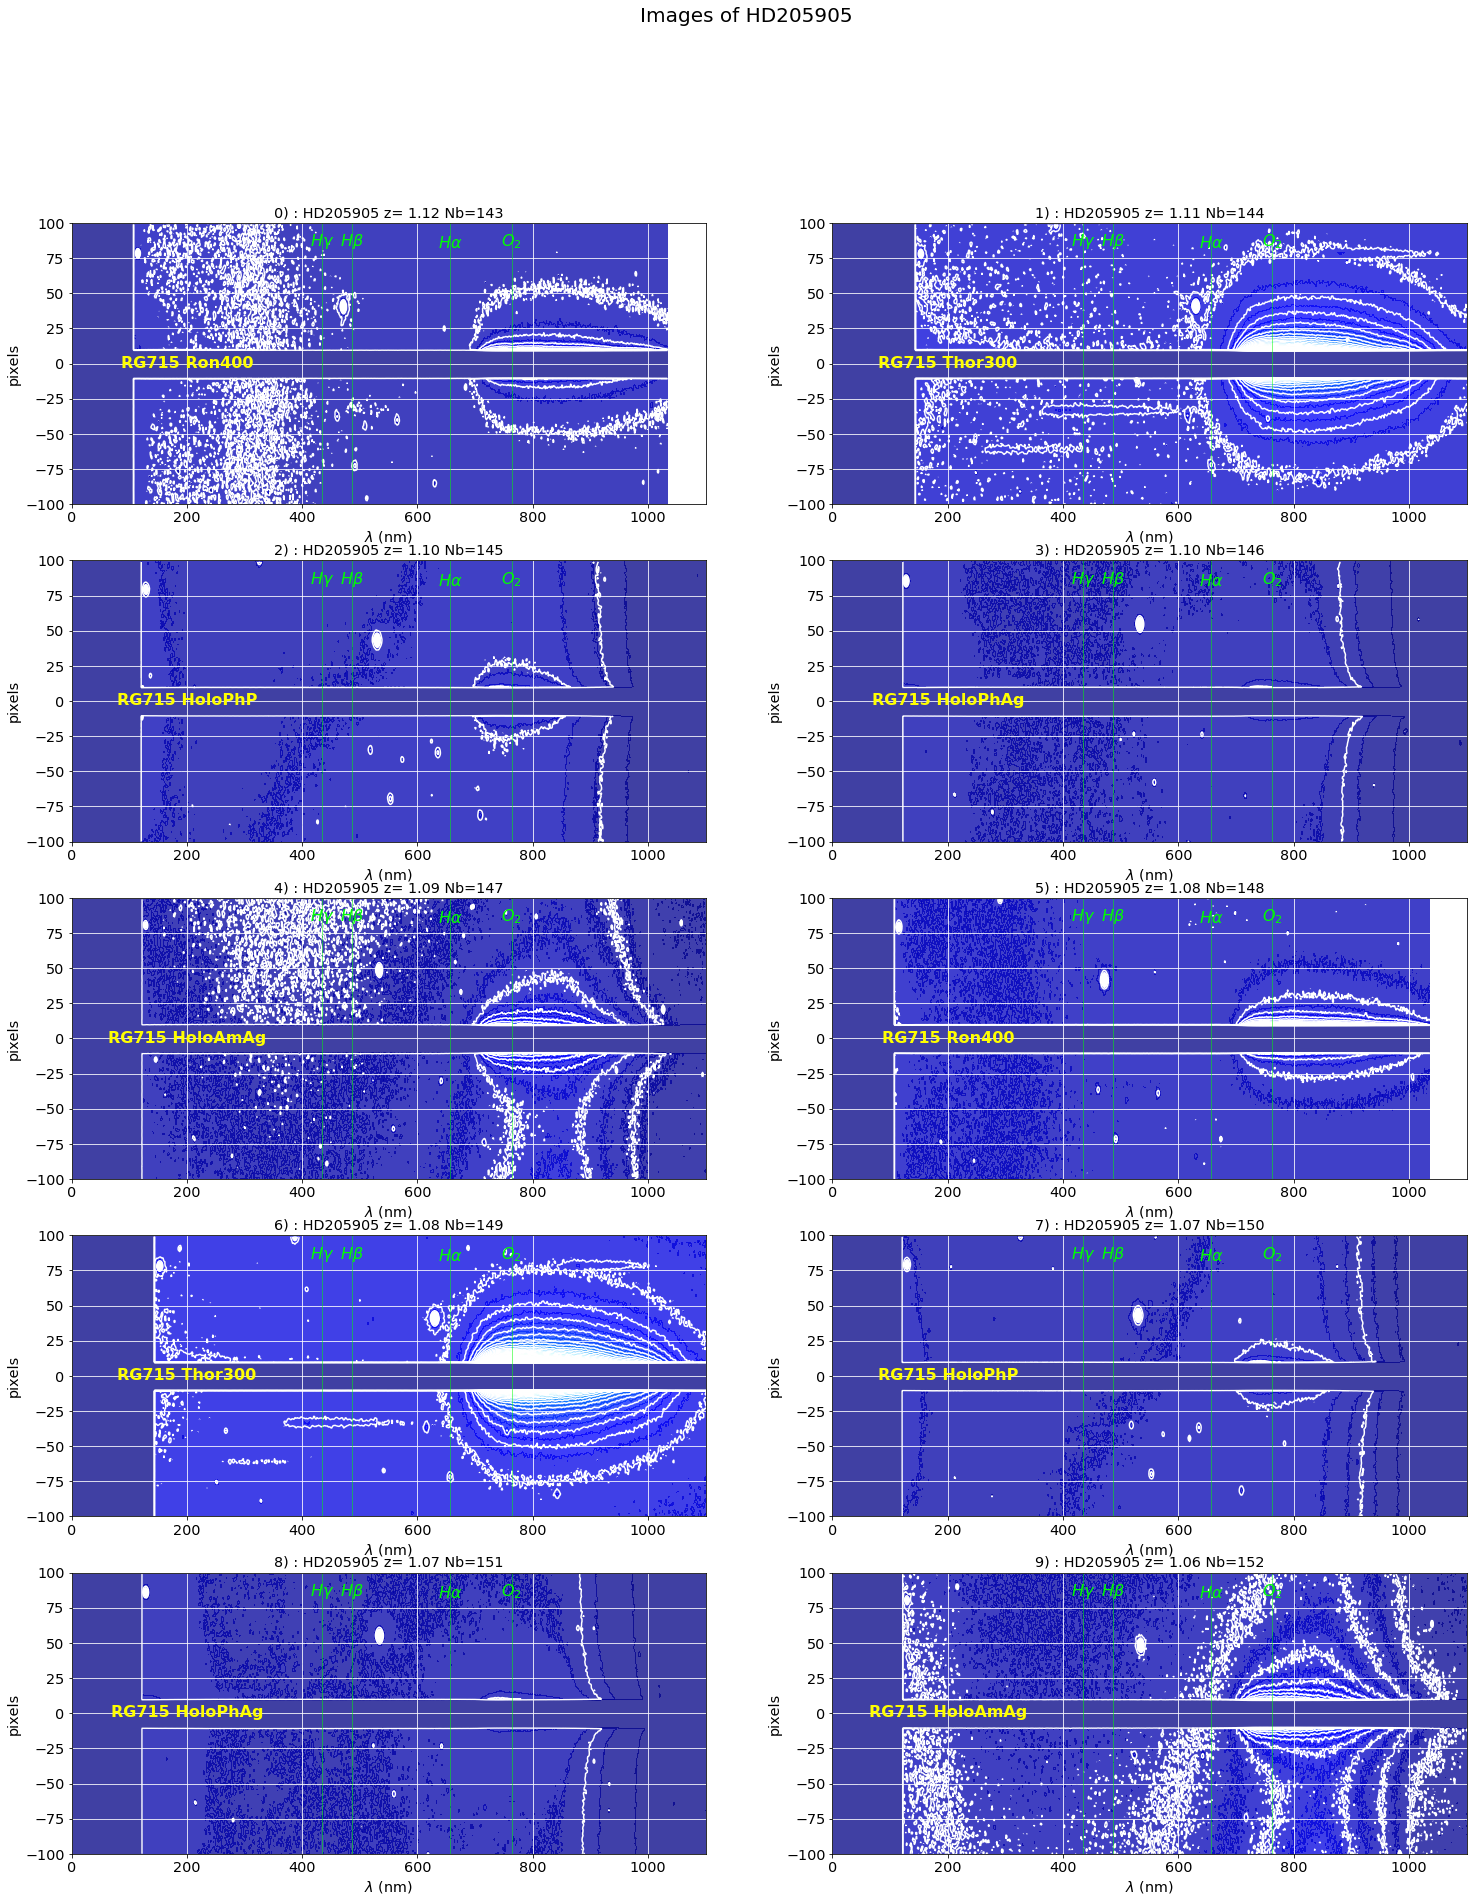

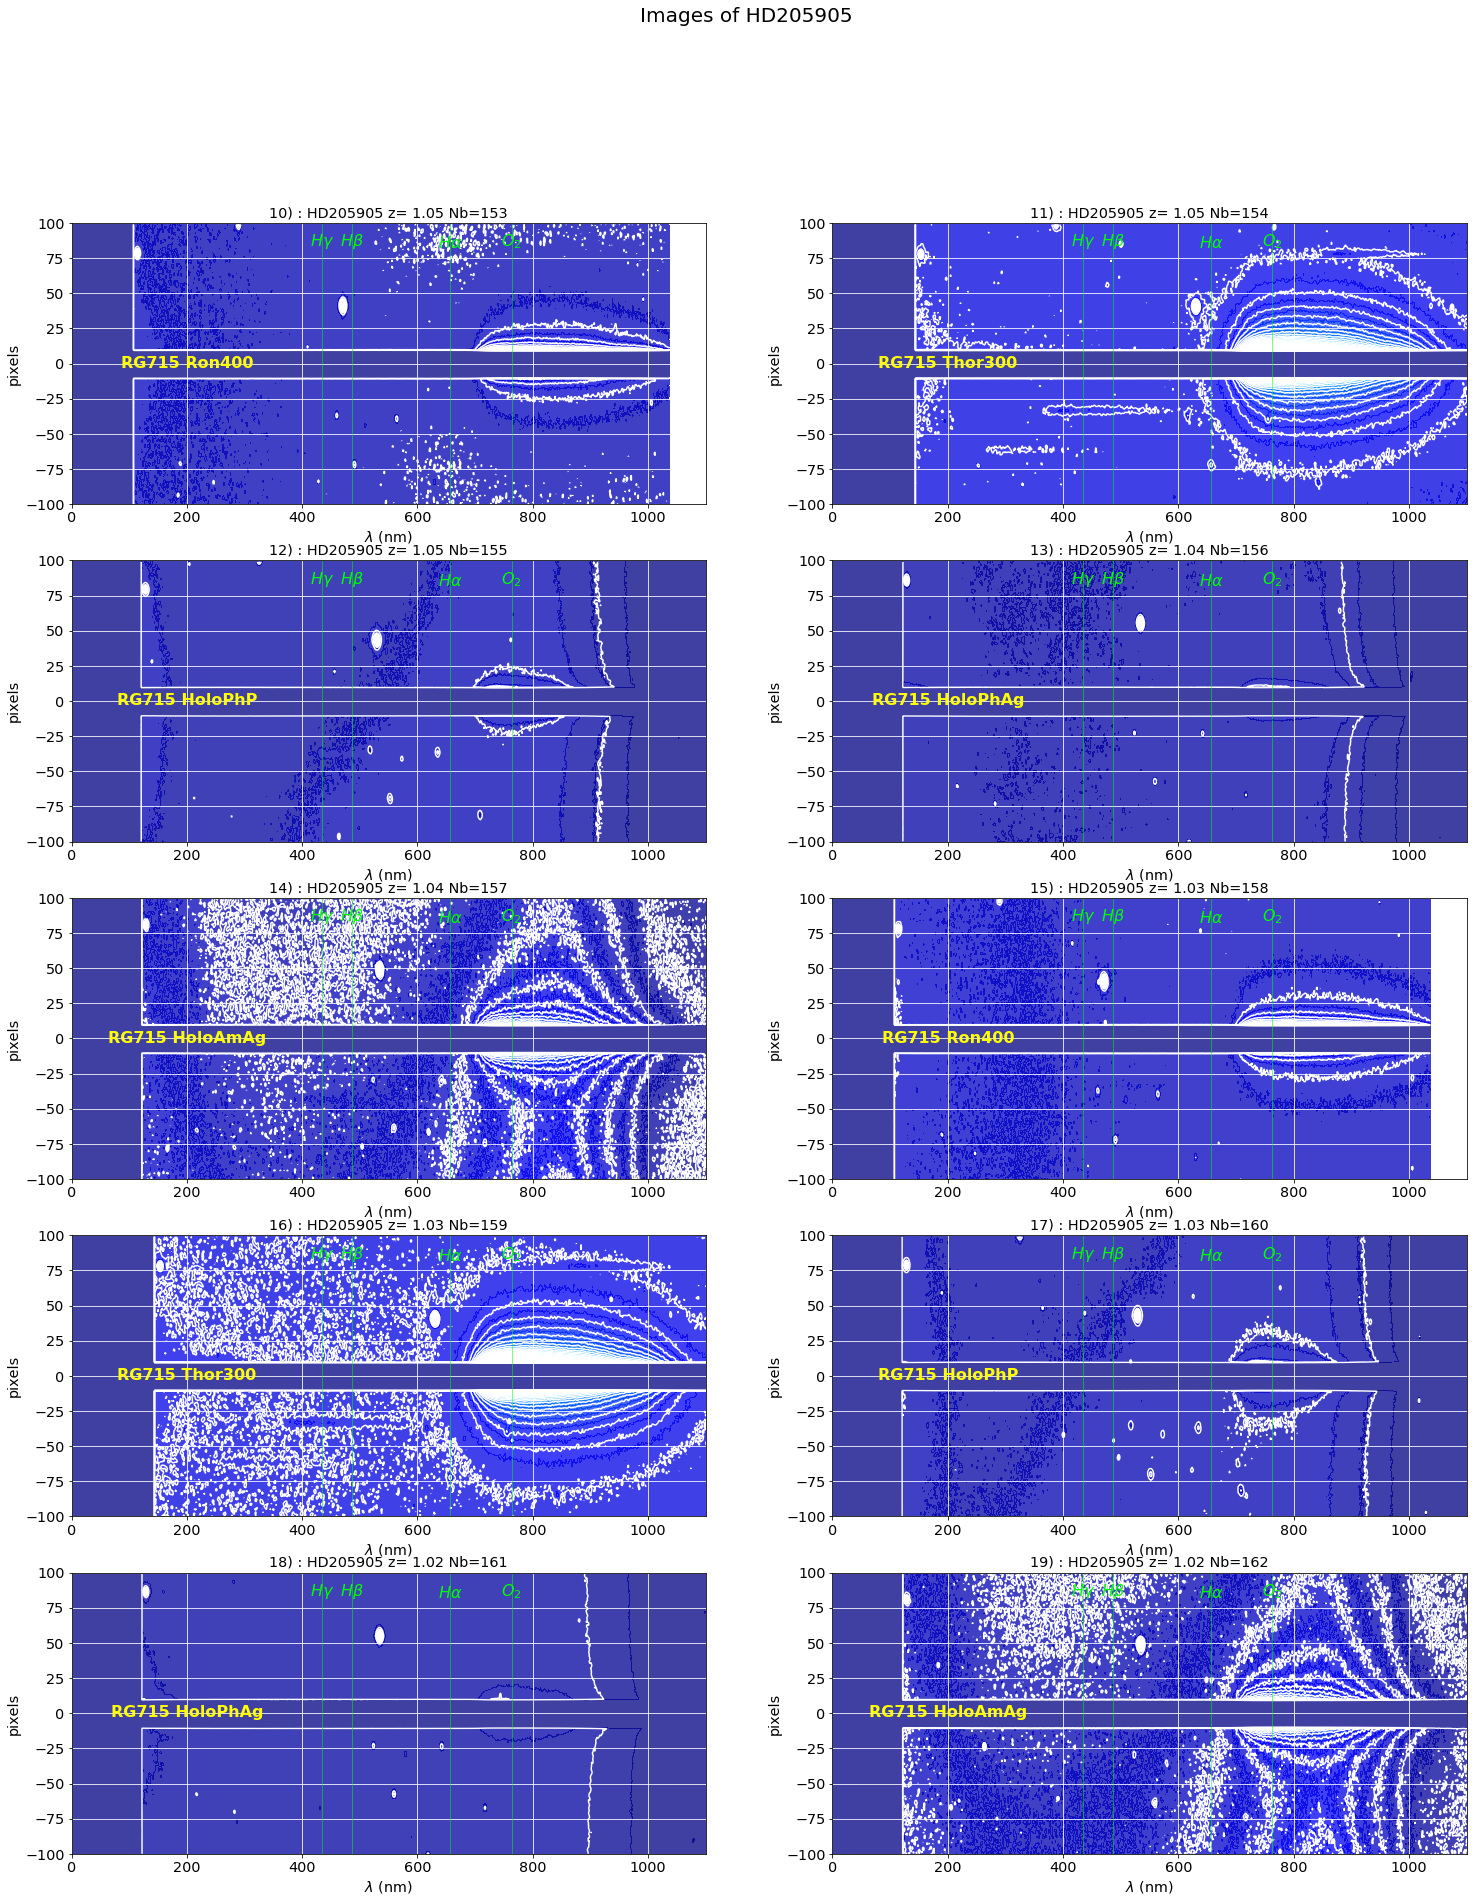

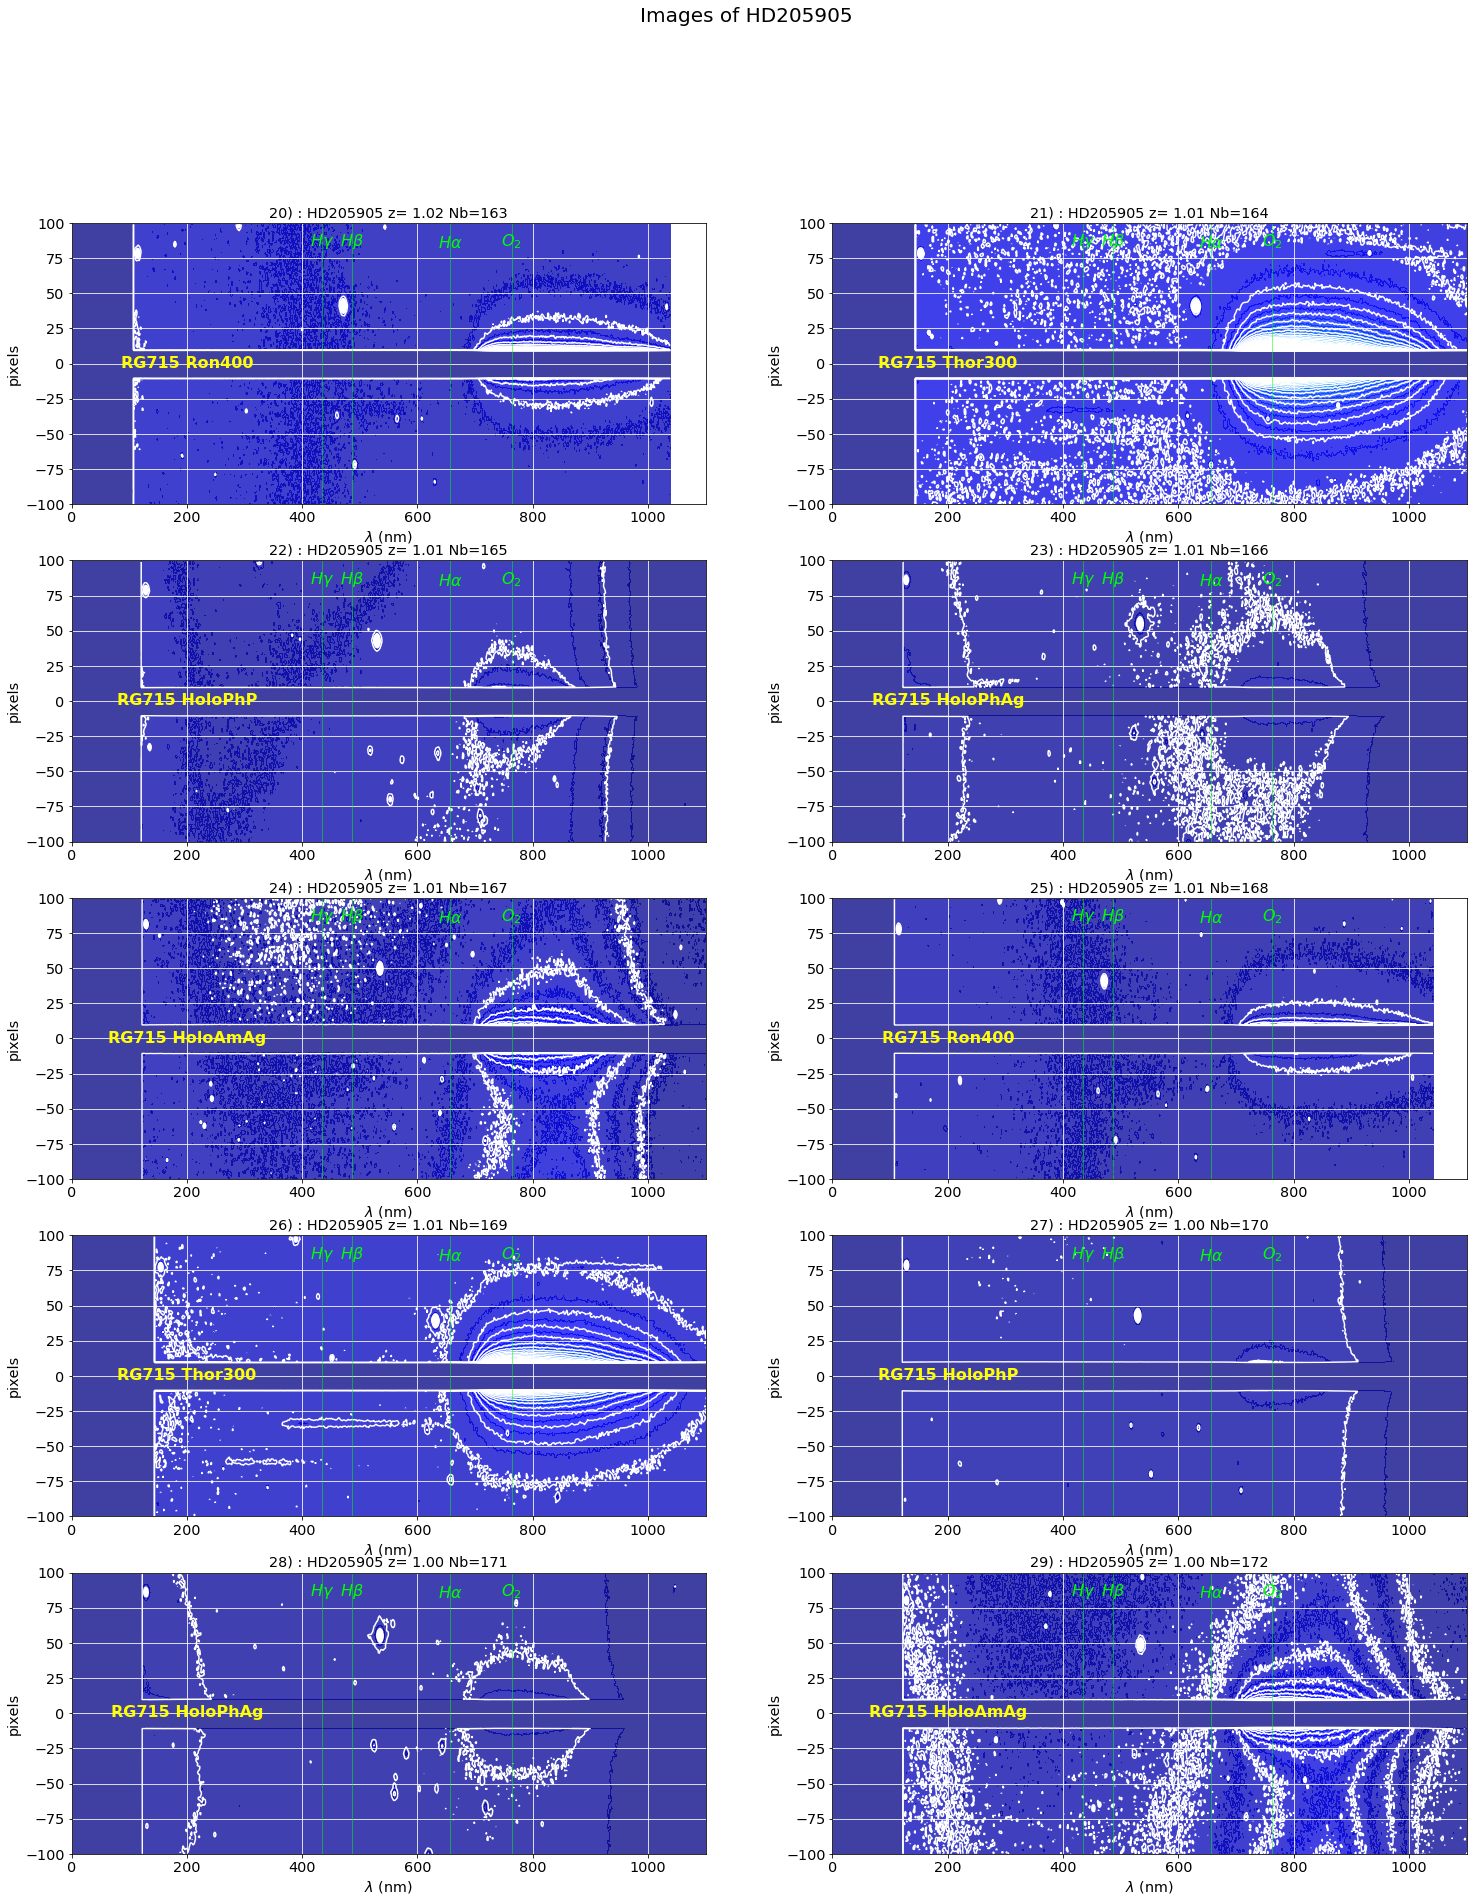

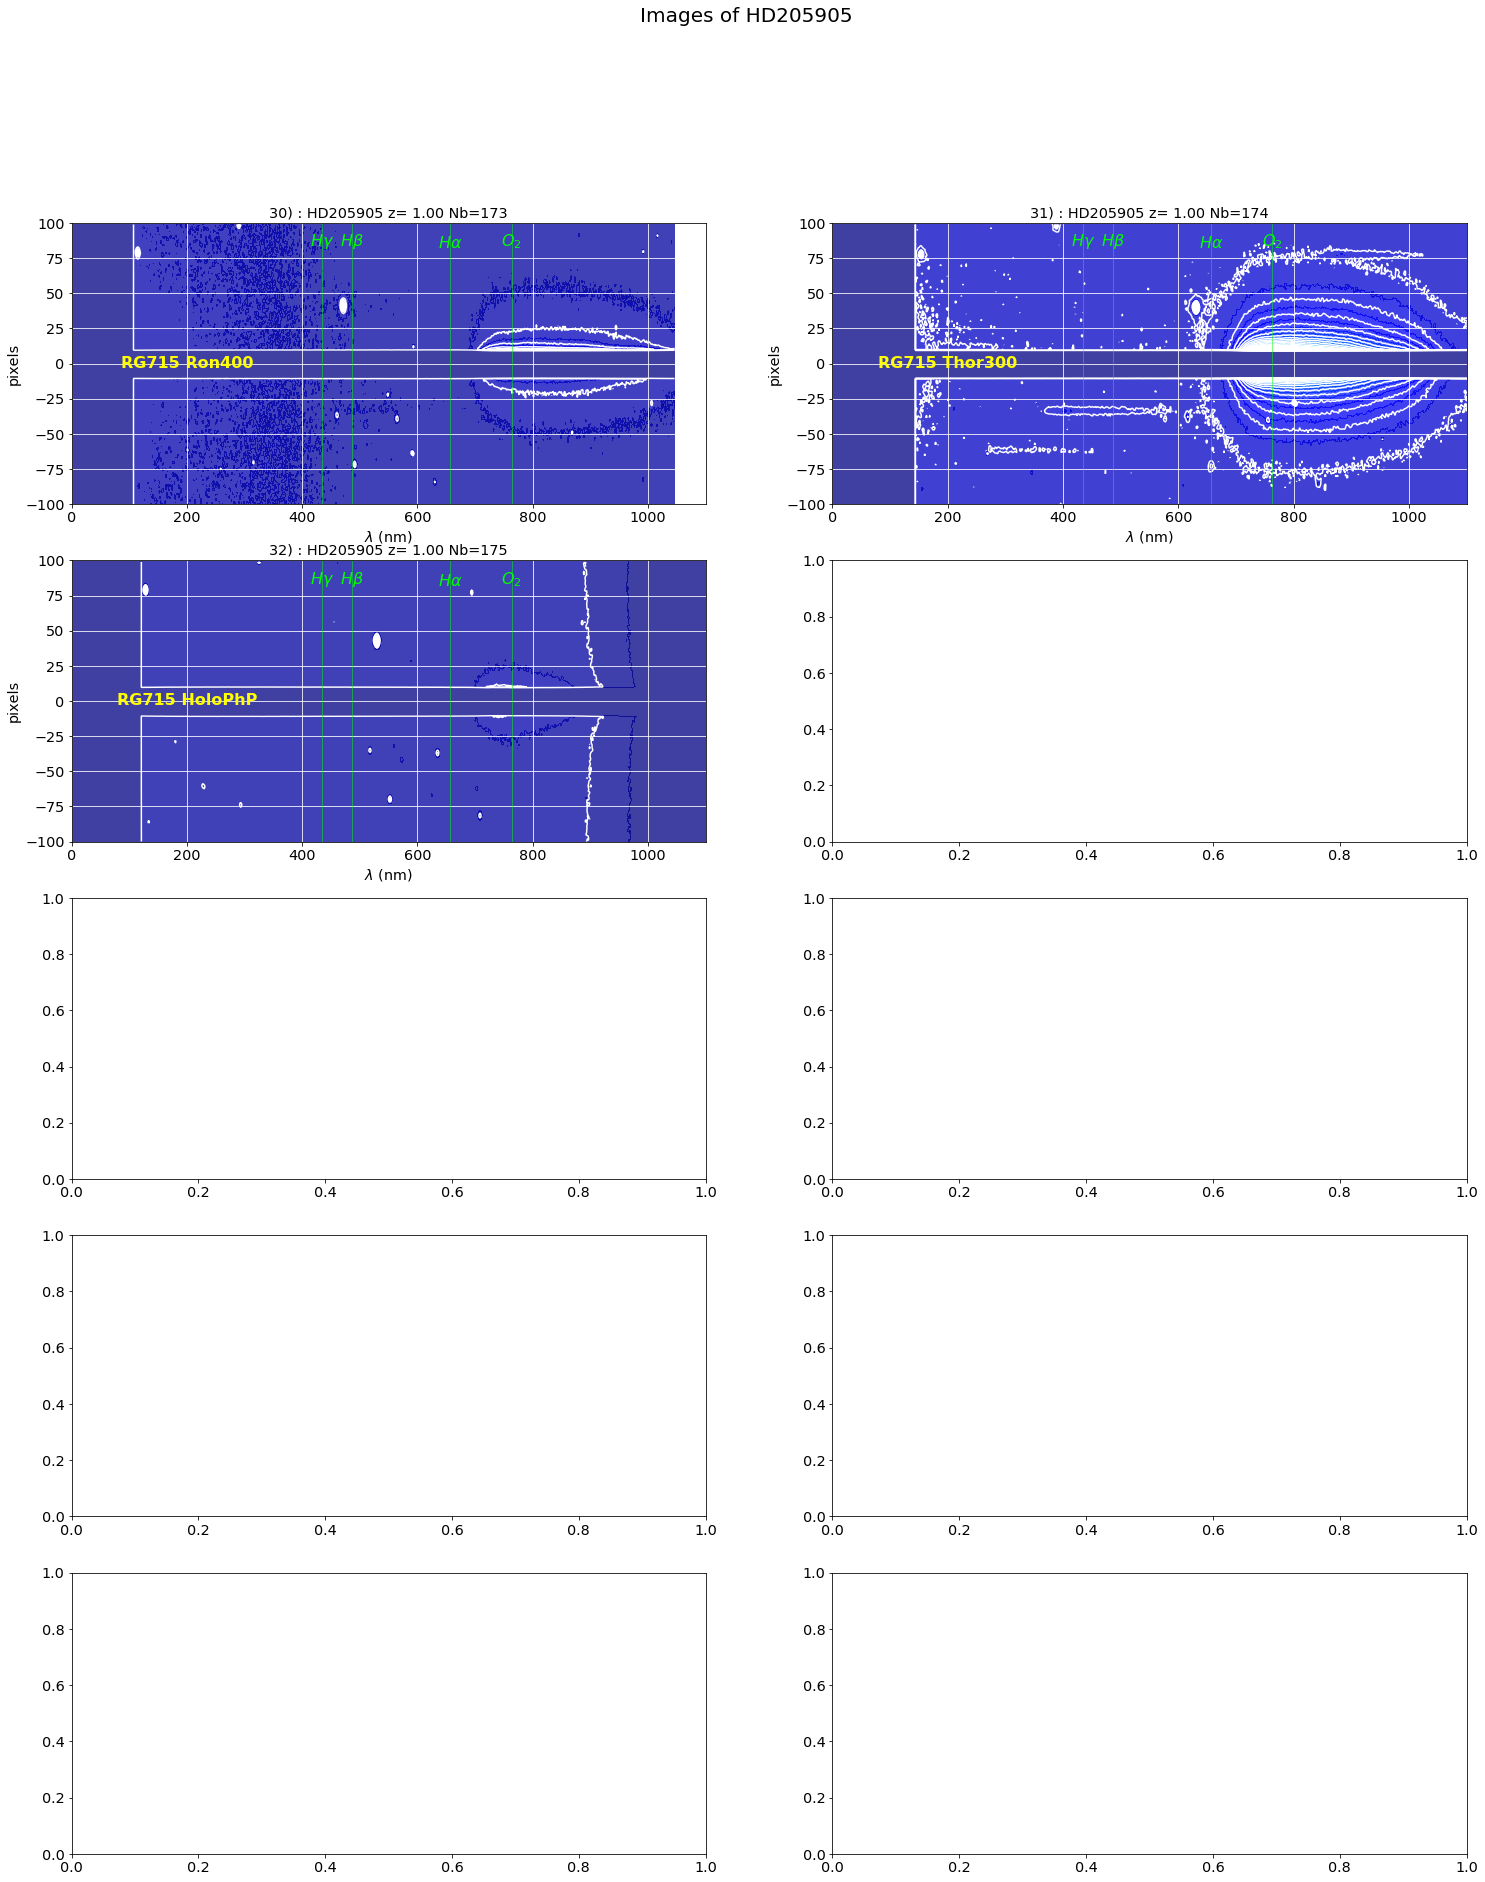

In [39]:
ShowOneOrder_contourCutBKG(all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt,'firstorderright_contour_cut.pdf')

# Study more carefully the transverse spectrum shape

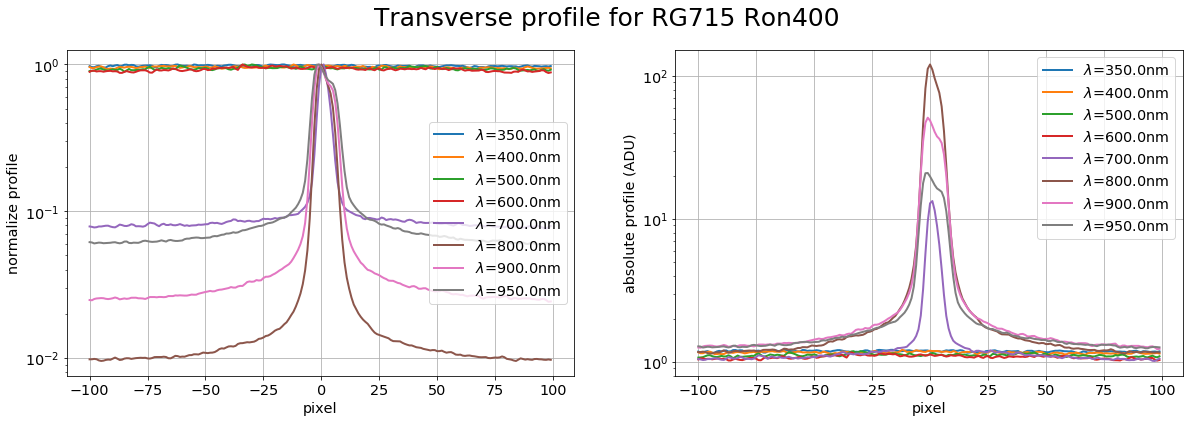

In [40]:
sel=0
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

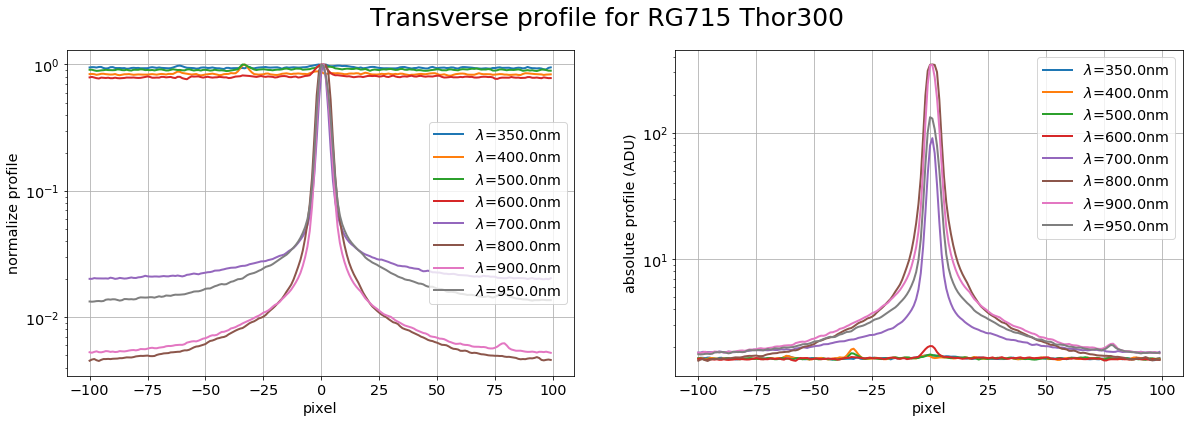

In [41]:
sel=1
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

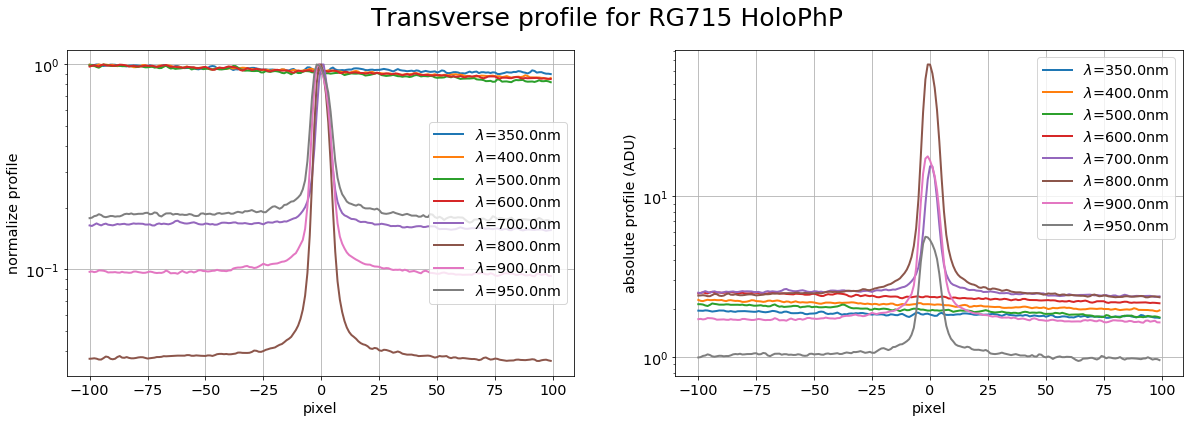

In [42]:
sel=2
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

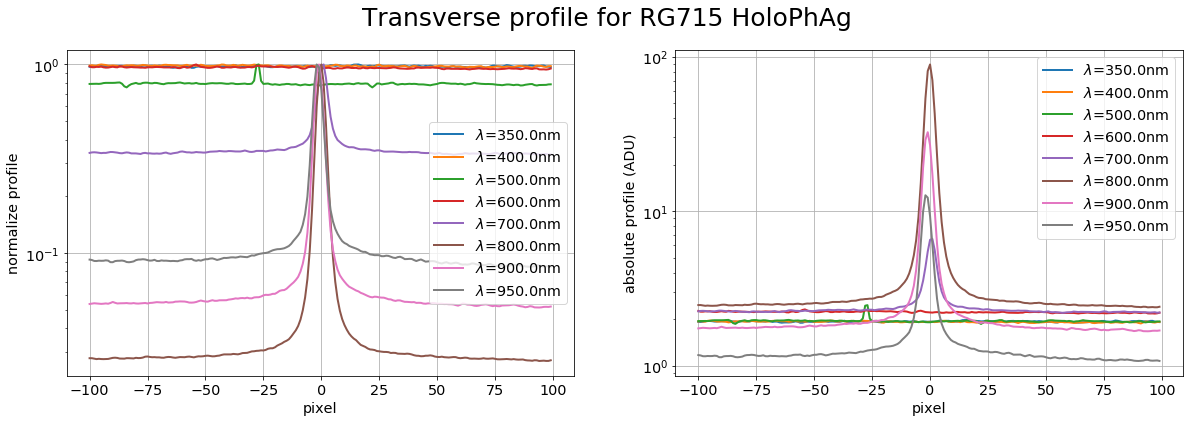

In [43]:
sel=3
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

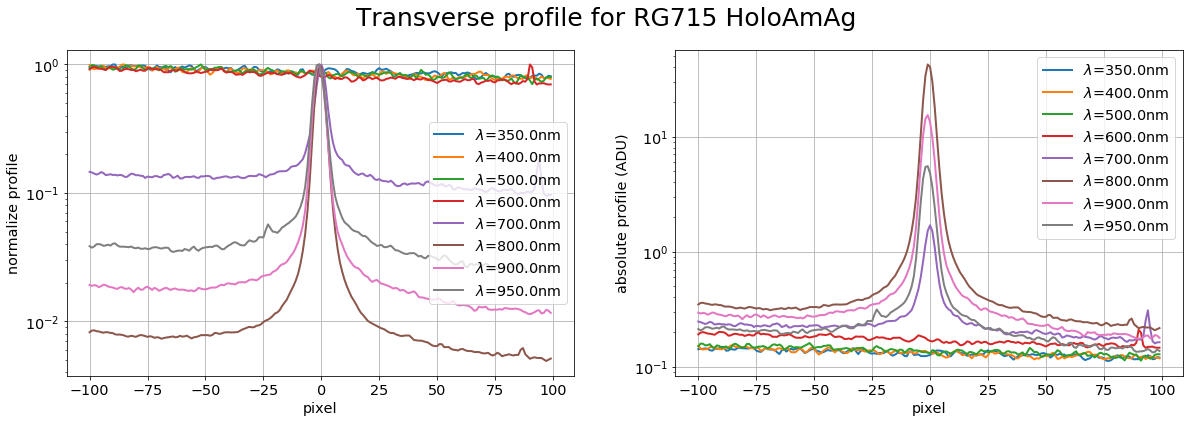

In [44]:
sel=4
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

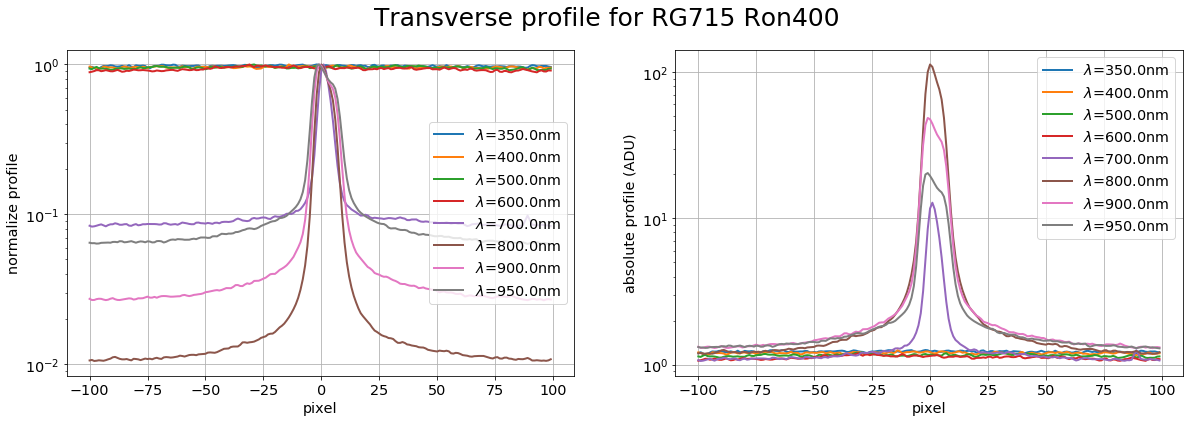

In [45]:
sel=5
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

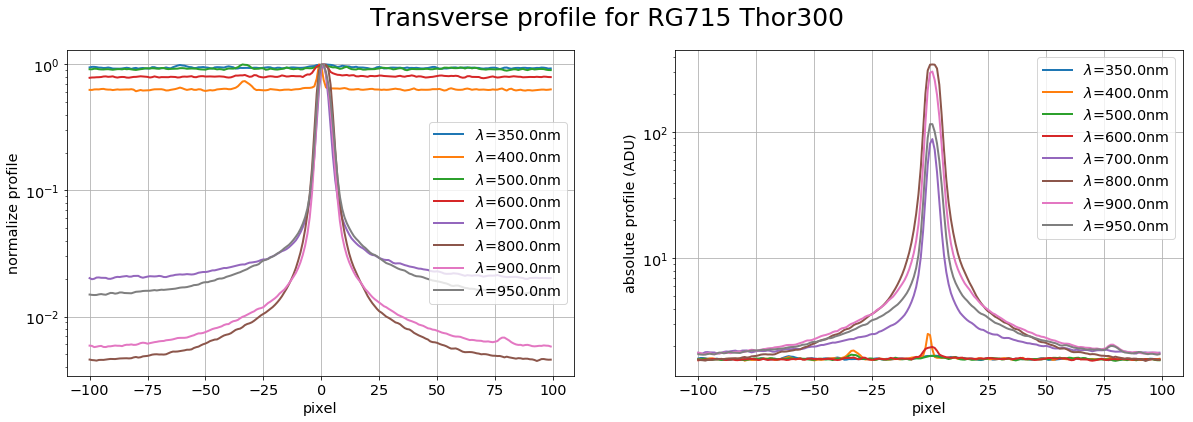

In [46]:
sel=6
ShowNarrowProfile(sel,all_images,order0_positions,x_star0,y_star0,all_titles,object_name,all_expo,dir_top_images,all_filt)

# Example of colorbar

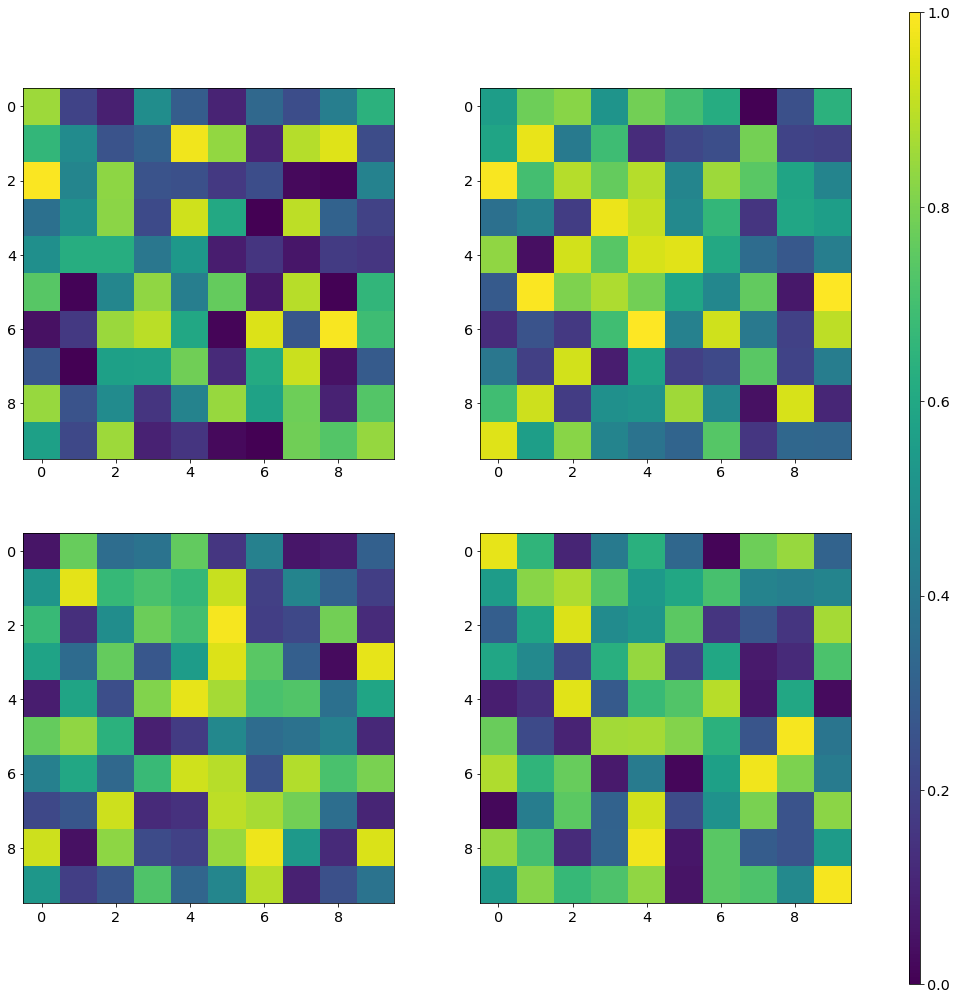

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.05, 0.01, 0.9])
fig.colorbar(im, cax=cbar_ax)

plt.show()